In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import gridspec
import mds
import xarray as xr
import xmitgcm
import seaborn as sns
import cmocean
import sys
import os
from IPython import display
import time
import xesmf as xe


In [2]:
from scipy.interpolate import griddata
from scipy.interpolate import interp2d


In [3]:
plt.rcParams.update({'font.size': 16
    , 'legend.markerscale': 1., 'axes.titlesize': 16, 'axes.labelsize' : 16,
      'legend.fontsize' : 14,'legend.handlelength': 3})

plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)

color2 = '#6495ed'
color1 = '#ff6347'
color5 = '#8470ff'
color3 = '#3cb371'
color4 = '#ffd700'
color6 = '#ba55d3'
plt.rcParams.update({'figure.figsize' : (14,6)})


In [4]:
dir_llc270 = '/central/groups/oceanphysics/anirban/llc270_2008_2009/test'
ds_llc270 =  xmitgcm.open_mdsdataset(dir_llc270,iters='all',geometry='llc',default_dtype='>f4')

In [5]:
ds_llc270

<xarray.Dataset>
Dimensions:   (face: 13, i: 270, i_g: 270, j: 270, j_g: 270, k: 50, k_l: 50, k_p1: 51, k_u: 50, time: 4)
Coordinates:
  * i         (i) int64 0 1 2 3 4 5 6 7 8 ... 262 263 264 265 266 267 268 269
  * i_g       (i_g) int64 0 1 2 3 4 5 6 7 8 ... 262 263 264 265 266 267 268 269
  * j         (j) int64 0 1 2 3 4 5 6 7 8 ... 262 263 264 265 266 267 268 269
  * j_g       (j_g) int64 0 1 2 3 4 5 6 7 8 ... 262 263 264 265 266 267 268 269
  * k         (k) int64 0 1 2 3 4 5 6 7 8 9 10 ... 40 41 42 43 44 45 46 47 48 49
  * k_u       (k_u) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * k_l       (k_l) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * k_p1      (k_p1) int64 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49 50
  * face      (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
    XC        (face, j, i) >f4 dask.array<shape=(13, 270, 270), chunksize=(1, 270, 270)>
    YC        (face, j, i) >f4 dask.array<shape=(13, 270, 270), chunksize=(1, 270,

In [6]:
XCfull = np.zeros((270,540))
XCfull[:,0:270] = np.rot90(ds_llc270.XC.sel(face=10).values)
XCfull[:,270:540] = ds_llc270.XC.sel(face=2).values

YCfull = np.zeros((270,540))
YCfull[:,0:270] = np.rot90(ds_llc270.YC.sel(face=10).values)
YCfull[:,270:540] = ds_llc270.YC.sel(face=2).values

XGfull = np.zeros((270,540))
XGfull[:,0:270] = np.rot90(ds_llc270.XG.sel(face=10).values)
XGfull[:,270:540] = ds_llc270.XG.sel(face=2).values

YGfull = np.zeros((270,540))
YGfull[:,0:270] = np.rot90(ds_llc270.YG.sel(face=10).values)
YGfull[:,270:540] = ds_llc270.YG.sel(face=2).values


In [7]:
fold = open('/central/groups/oceanphysics/anirban/NA/inputfiles/NA_2160/NA_2160/input_ll1815/delYFile', 'rb')
delYold1815 = np.fromfile(fold, '>f4')
delYold1815.shape

(532,)

In [8]:
ds0 = xmitgcm.open_mdsdataset('/central/groups/oceanphysics/anirban/ll181502/grid_ll1815',iters=None,default_dtype='>f4')
ds0

/central/groups/oceanphysics/anirban/miniconda/envs/mypythonenv1/lib/python3.6/site-packages/xmitgcm-0.2.2-py3.6.egg/xmitgcm/mds_store.py:807: UserWarning: Couldn't find available_diagnostics.log in /central/groups/oceanphysics/anirban/ll181502/grid_ll1815. Using default version.
  "in %s. Using default version." % data_dir)


<xarray.Dataset>
Dimensions:  (XC: 1815, XG: 1815, YC: 532, YG: 532, Z: 100, Zl: 100, Zp1: 101, Zu: 100)
Coordinates:
  * XC       (XC) >f4 -81.5625 -81.520836 -81.47917 ... -6.020836 -5.9791694
  * YC       (YC) >f4 26.87238 26.906544 26.9407 ... 43.428173 43.456318
  * XG       (XG) >f4 -81.583336 -81.54167 -81.5 ... -6.0416694 -6.0000024
  * YG       (YG) >f4 26.855293 26.889463 26.923624 ... 43.414097 43.44225
  * Z        (Z) >f4 -2.5 -7.5 -12.5 -17.5 ... -5568.185 -5790.69 -6018.94
  * Zp1      (Zp1) >f4 0.0 -5.0 -10.0 -15.0 ... -5678.0 -5903.38 -6134.5
  * Zu       (Zu) >f4 -5.0 -10.0 -15.0 -20.0 ... -5678.0 -5903.38 -6134.5
  * Zl       (Zl) >f4 0.0 -5.0 -10.0 -15.0 ... -5244.5 -5458.37 -5678.0 -5903.38
    rA       (YC, XC) >f4 dask.array<shape=(532, 1815), chunksize=(532, 1815)>
    dxG      (YG, XC) >f4 dask.array<shape=(532, 1815), chunksize=(532, 1815)>
    dyG      (YC, XG) >f4 dask.array<shape=(532, 1815), chunksize=(532, 1815)>
    Depth    (YC, XC) >f4 dask.array<shape

In [9]:
ds0.XG.min(), ds0.YG.min(), ds0.XG.max(), ds0.YG.max()

(<xarray.DataArray 'XG' ()>
 array(-81.583336, dtype=float32), <xarray.DataArray 'YG' ()>
 array(26.855293, dtype=float32), <xarray.DataArray 'XG' ()>
 array(-6.000002, dtype=float32), <xarray.DataArray 'YG' ()>
 array(43.44225, dtype=float32))

In [10]:
ds0.XC.min(), ds0.YC.min(), ds0.XC.max(), ds0.YC.max()

(<xarray.DataArray 'XC' ()>
 array(-81.5625, dtype=float32), <xarray.DataArray 'YC' ()>
 array(26.87238, dtype=float32), <xarray.DataArray 'XC' ()>
 array(-5.979169, dtype=float32), <xarray.DataArray 'YC' ()>
 array(43.456318, dtype=float32))

In [11]:
idy = (np.where((YGfull[:,-2]>=26.) & (YGfull[:,-2]<44))[0])
YGsmall=YGfull[idy,:]
YCsmall=YCfull[idy,:]
idx = (np.where((XGfull[2,:]>=-81.) & (XGfull[2,:]<-5))[0])
XGsmall=XGfull[:,idx]
XCsmall=XCfull[:,idx]
XC = XCsmall[idy]
YC = YCsmall[:,idx]
XG = XGsmall[idy]
YG = YGsmall[:,idx]
XC.shape, YC.shape, XG.shape, YG.shape


((72, 228), (72, 228), (72, 228), (72, 228))

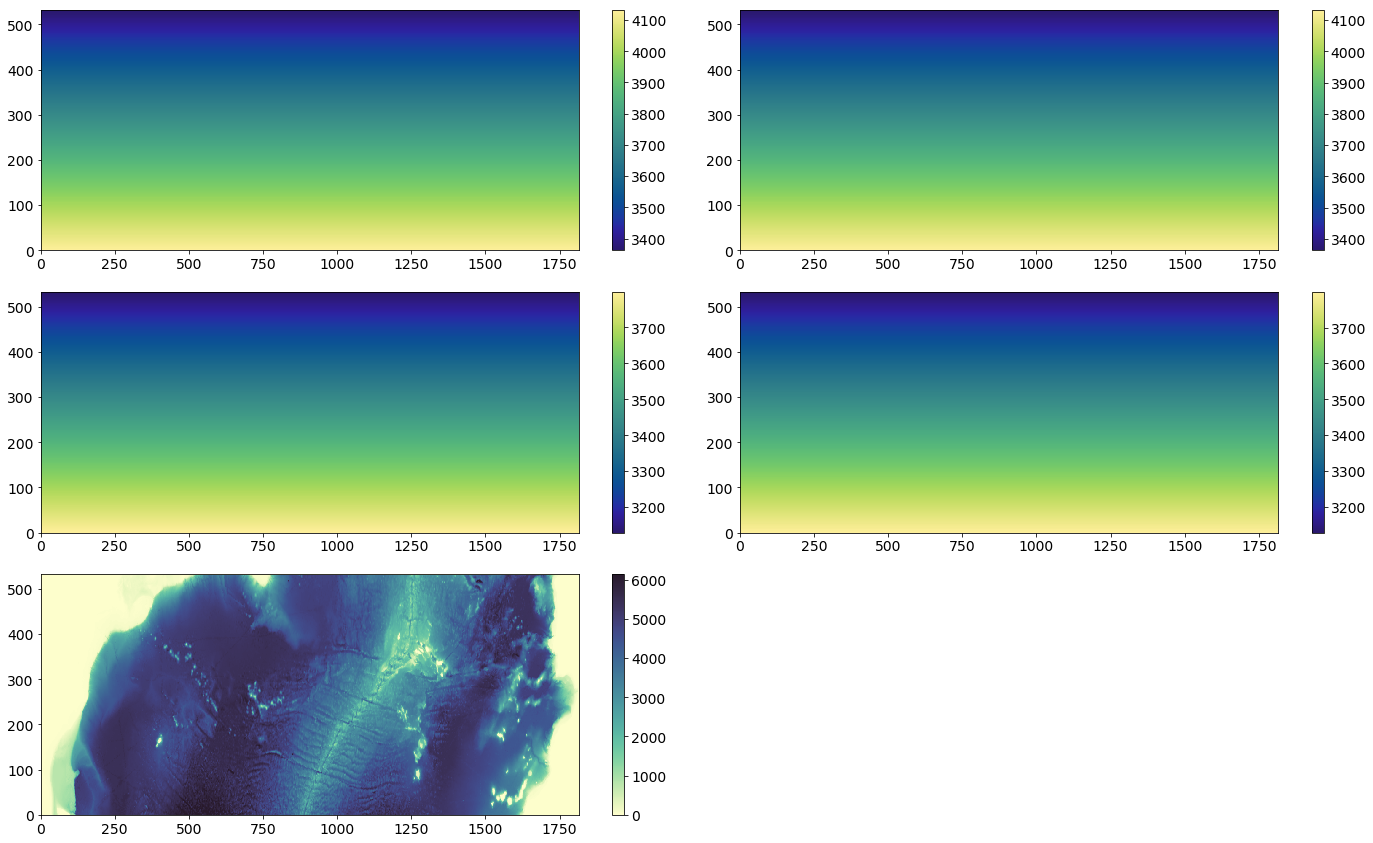

In [12]:
plt.figure(figsize=(20,12))
plt.subplot(321)
plt.pcolormesh(ds0.dxC, cmap=cmocean.cm.haline);plt.colorbar()
plt.subplot(322)
plt.pcolormesh(ds0.dxG, cmap=cmocean.cm.haline);plt.colorbar()
plt.subplot(323)
plt.pcolormesh(ds0.dyC, cmap=cmocean.cm.haline);plt.colorbar()
plt.subplot(324)
plt.pcolormesh(ds0.dyG, cmap=cmocean.cm.haline);plt.colorbar()
plt.subplot(325)
plt.pcolormesh(ds0.Depth, cmap=cmocean.cm.deep);plt.colorbar()
plt.tight_layout()

In [13]:
Saltfull = np.zeros((50,270,540))
Saltfull[:,:,0:270] =  np.rot90(ds_llc270.where(ds_llc270.hFacC).isel(time=0).SALT.sel(face=10).values, 1, (1,2))
Saltfull[:,:,270:540] =  ds_llc270.where(ds_llc270.hFacC).isel(time=0).SALT.sel(face=2).values
Salt = Saltfull[:,idy][:,:,idx]

Thetafull = np.ma.zeros((50,270,540))
Thetafull[:,:,0:270] =  np.rot90(ds_llc270.where(ds_llc270.hFacC).isel(time=0).THETA.sel(face=10).values, 1, (1,2))
Thetafull[:,:,270:540] =  ds_llc270.where(ds_llc270.hFacC).isel(time=0).THETA.sel(face=2).values
Theta = Thetafull[:,idy][:,:,idx]

Ufull = np.zeros((50,270,540))
#Ufull[:,:,0:270] =  np.rot90(ds_llc270.where(ds_llc270.hFacW).isel(time=0).UVELMASS.sel(face=10).values, 1, (1,2))
Ufull[:,:,0:270] =  np.rot90(ds_llc270.where(ds_llc270.hFacS).isel(time=0).VVELMASS.sel(face=10).values, 1, (1,2))
Ufull[:,:,270:540] =  ds_llc270.where(ds_llc270.hFacW).isel(time=0).UVELMASS.sel(face=2).values
U = Ufull[:,idy][:,:,idx]

Vfull = np.zeros((50,270,540))
#Vfull[:,:,0:270] =  np.rot90(ds_llc270.where(ds_llc270.hFacS).isel(time=0).VVELMASS.sel(face=10).values, 1, (1,2))
Vfull[:,:,0:270] =  np.rot90(ds_llc270.where(ds_llc270.hFacW).isel(time=0).UVELMASS.sel(face=10).values*-1, 1, (1,2))
Vfull[:,:,270:540] =  ds_llc270.where(ds_llc270.hFacS).isel(time=0).VVELMASS.sel(face=2).values
V = Vfull[:,idy][:,:,idx]

depthfull = np.zeros((270,540))
depthfull[:,0:270] = np.rot90(ds_llc270.Depth.sel(face=10).values)
depthfull[:,270:540] = ds_llc270.Depth.sel(face=2).values
depth = depthfull[idy,:][:,idx]

/central/groups/oceanphysics/anirban/miniconda/envs/mypythonenv1/lib/python3.6/site-packages/dask/array/core.py:3141: PerformanceWarning: Increasing number of chunks by factor of 50
  **blockwise_kwargs)
/central/groups/oceanphysics/anirban/miniconda/envs/mypythonenv1/lib/python3.6/site-packages/dask/array/core.py:3141: PerformanceWarning: Increasing number of chunks by factor of 50
  **blockwise_kwargs)
/central/groups/oceanphysics/anirban/miniconda/envs/mypythonenv1/lib/python3.6/site-packages/dask/array/core.py:3141: PerformanceWarning: Increasing number of chunks by factor of 50
  **blockwise_kwargs)
/central/groups/oceanphysics/anirban/miniconda/envs/mypythonenv1/lib/python3.6/site-packages/dask/array/core.py:3141: PerformanceWarning: Increasing number of chunks by factor of 50
  **blockwise_kwargs)
/central/groups/oceanphysics/anirban/miniconda/envs/mypythonenv1/lib/python3.6/site-packages/dask/array/core.py:3141: PerformanceWarning: Increasing number of chunks by factor of 50
  

In [14]:
dxcfull = np.zeros((270,540))
dxcfull[:,0:270] = np.rot90(ds_llc270.dyC.sel(face=10).values)
#dxcfull[:,0:270] = ds_llc270.dxC.sel(face=10).values
dxcfull[:,270:540] = ds_llc270.dxC.sel(face=2).values
dxc = dxcfull[idy,:][:,idx]

dxgfull = np.zeros((270,540))
dxgfull[:,0:270] = np.rot90(ds_llc270.dyG.sel(face=10).values)
#dxgfull[:,0:270] = ds_llc270.dxG.sel(face=10).values
dxgfull[:,270:540] = ds_llc270.dxG.sel(face=2).values
dxg = dxgfull[idy,:][:,idx]

dycfull = np.zeros((270,540))
dycfull[:,0:270] = np.rot90(ds_llc270.dxC.sel(face=10).values)
#dycfull[:,0:270] = ds_llc270.dyC.sel(face=10).values
dycfull[:,270:540] = ds_llc270.dyC.sel(face=2).values
dyc = dycfull[idy,:][:,idx]

dygfull = np.zeros((270,540))
dygfull[:,0:270] = np.rot90(ds_llc270.dxG.sel(face=10).values)
dygfull[:,270:540] = ds_llc270.dyG.sel(face=2).values
dyg = dygfull[idy,:][:,idx]

Text(0.5,1,'left = 29825.1171875 right = 29825.1171875')

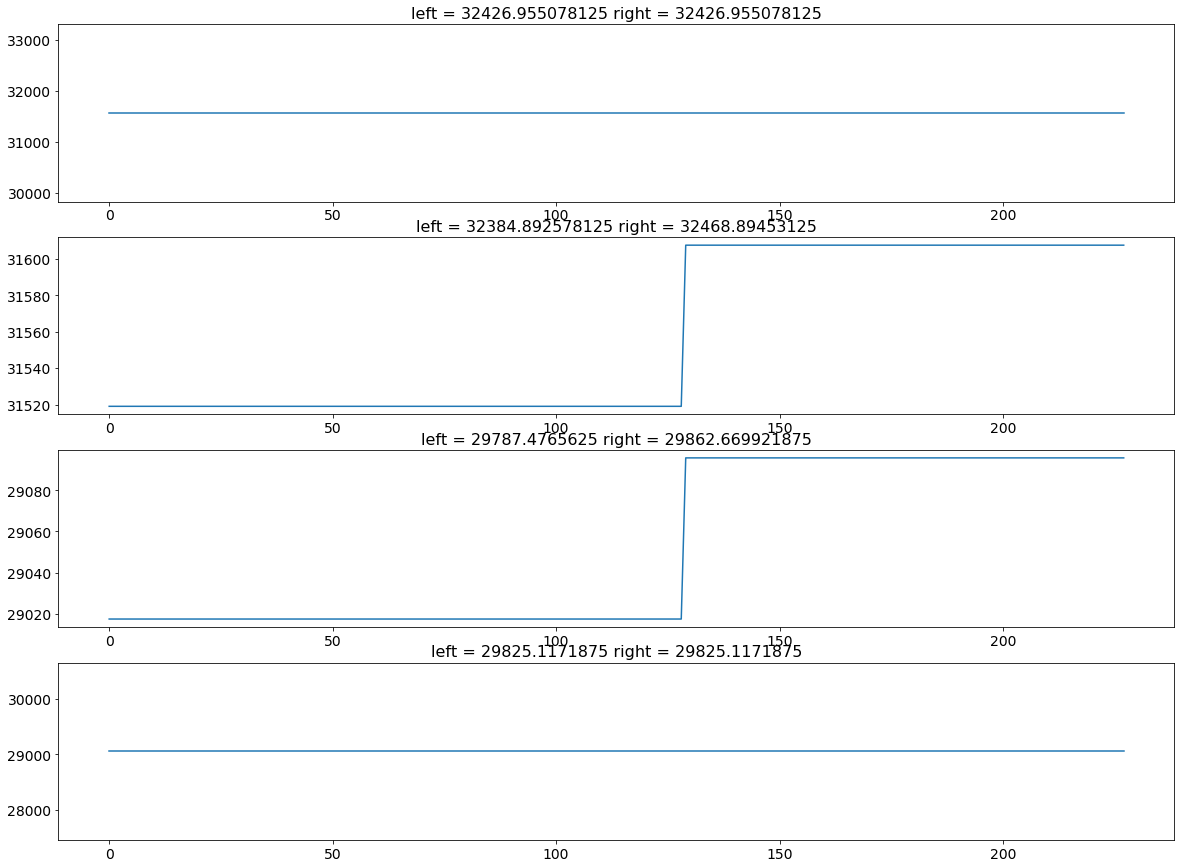

In [15]:
plt.figure(figsize=(20,15))
plt.subplot(411)
plt.plot(dxc[20])
plt.title('left = %s right = %s' %(dxc[10,100], dxc[10,150]))

plt.subplot(412)
plt.plot(dxg[20])
plt.title('left = %s right = %s' %(dxg[10,100], dxg[10,150]))

plt.subplot(413)
plt.plot(dyc[20])
plt.title('left = %s right = %s' %(dyc[10,100], dyc[10,150]))

plt.subplot(414)
plt.plot(dyg[20])
plt.title('left = %s right = %s' %(dyg[10,100], dyg[10,150]))


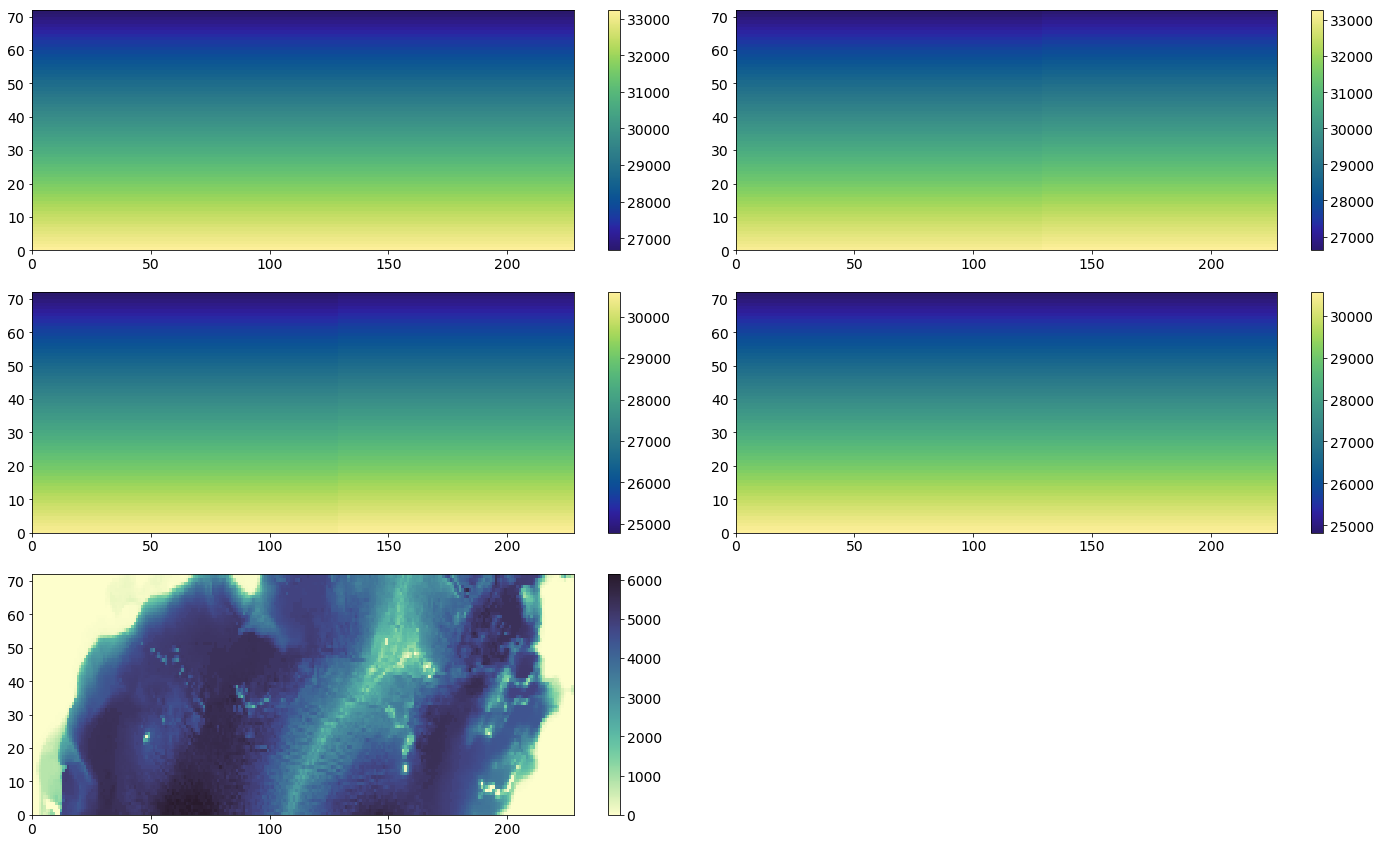

In [16]:
plt.figure(figsize=(20,12))
plt.subplot(321)
plt.pcolormesh(dxc, cmap=cmocean.cm.haline);plt.colorbar()
plt.subplot(322)
plt.pcolormesh(dxg, cmap=cmocean.cm.haline);plt.colorbar()
plt.subplot(323)
plt.pcolormesh(dyc, cmap=cmocean.cm.haline);plt.colorbar()
plt.subplot(324)
plt.pcolormesh(dyg, cmap=cmocean.cm.haline);plt.colorbar()
plt.subplot(325)
plt.pcolormesh(depth, cmap=cmocean.cm.deep);plt.colorbar()
plt.tight_layout()

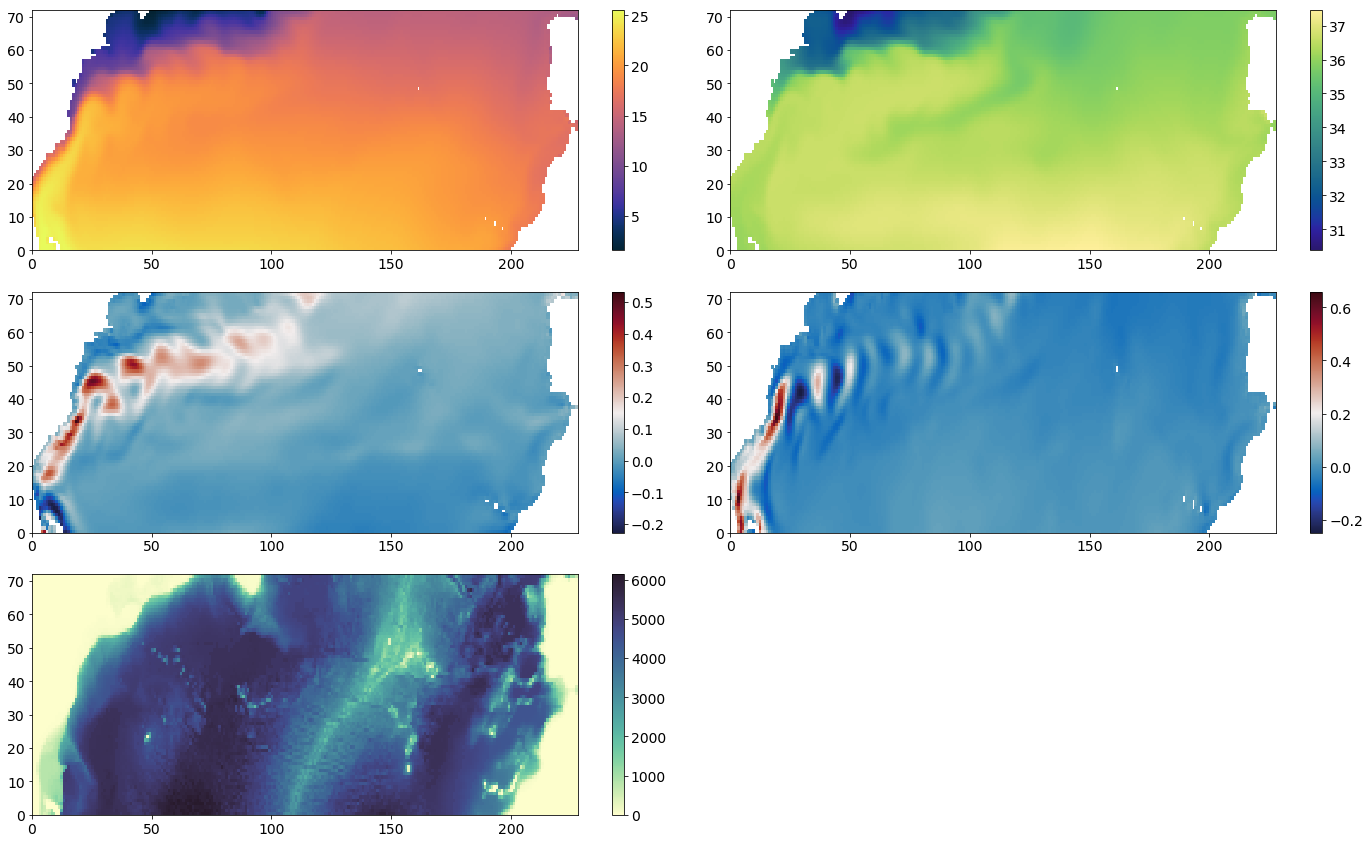

In [17]:
plt.figure(figsize=(20,12))
plt.subplot(321)
plt.pcolormesh(Theta[0], cmap=cmocean.cm.thermal);plt.colorbar()
plt.subplot(322)
plt.pcolormesh(Salt[0], cmap=cmocean.cm.haline);plt.colorbar()
plt.subplot(323)
plt.pcolormesh(U[0], cmap=cmocean.cm.balance);plt.colorbar()
plt.subplot(324)
plt.pcolormesh(V[0], cmap=cmocean.cm.balance);plt.colorbar()
plt.subplot(325)
plt.pcolormesh(depth, cmap=cmocean.cm.deep);plt.colorbar()
plt.tight_layout()

In [18]:
xc_fine = ds0.XC.values
yc_fine = ds0.YC.values
xg_fine = ds0.XG.values
yg_fine = ds0.YG.values

z_fine = ds0.Z.values

xc = XC[10]
yc = YC[:,10]

xg = XG[10]
yg = YG[:,10]


z = ds_llc270.Z.values

In [19]:
f_u =  interp2d(xc,yc, depth, kind='linear')
depth_u = f_u(xg, yc)
f_v =  interp2d(xc,yc, depth, kind='linear')
depth_v = f_v(xc, yg)

In [20]:
def fill_land(dataarray, x,y):
    xx,yy = np.meshgrid(x,y)
    assert xx.shape == dataarray.shape
    assert yy.shape == dataarray.shape
    data = dataarray.ravel()[~np.isnan(dataarray.ravel())]
    xpts = xx.ravel()[~np.isnan(dataarray.ravel())]
    ypts = yy.ravel()[~np.isnan(dataarray.ravel())]
    
    
    data_filled = griddata((xpts, ypts), data, (xx,yy), method='nearest',rescale=True)
    return data_filled

In [21]:
Salt_noland = np.zeros_like(Salt)
Theta_noland = np.zeros_like(Salt)
U_noland = np.zeros_like(Salt)
V_noland = np.zeros_like(Salt)
for i in range(len(Salt)):
    Salt_noland[i] = fill_land(Salt[i],xc,yc)
    Theta_noland[i] = fill_land(Theta[i],xc,yc)
    U_noland[i] = fill_land(U[i],xg,yc)
    V_noland[i] = fill_land(V[i],xc,yg)
    

In [22]:
def Xpolate(field):
    x = field.copy()
    x0 = field.copy()
    [M,N] = x.shape
    y = np.nan*np.ones((M,N)); y[0:M,0:N] = x;
    X,Y = np.meshgrid(np.arange(N),np.arange(M))
    m = M; n= N
    y[np.isnan(x)]=np.nanmean(x)
    mc = np.fix(M/2)+1;nc=np.fix(N/2)+1
    w=np.zeros((m,n));
    maxx=np.max(x); minx=np.min(x);
    for i in range(int(max(mc,nc))):
        f=np.fft.fftshift(np.fft.fft2(y));
        w[int(max((mc-i),0)):int(min((mc+i),m)),int(max((nc-i),0)):int(min((nc+i),n))] = 1
        f=f*w;
        f=np.real(np.fft.ifft2(np.fft.ifftshift(f)));
        y[np.isnan(x0)]=f[np.isnan(x0)];                       
        y[y>maxx]=maxx;
        y[y<minx]=minx;
    y=y[:M,:N];
    return y

In [23]:
Salt_nolandx = np.zeros_like(Salt)
Theta_nolandx = np.zeros_like(Salt)
U_nolandx = np.zeros_like(Salt)
V_nolandx = np.zeros_like(Salt)
for i in range(len(Salt)):
    Salt_nolandx[i] = Xpolate(Salt[i])
    Theta_nolandx[i] = Xpolate(Theta[i])
    U_nolandx[i] = Xpolate(U[i])
    V_nolandx[i] = Xpolate(V[i])
    

/central/groups/oceanphysics/anirban/miniconda/envs/mypythonenv1/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in greater
/central/groups/oceanphysics/anirban/miniconda/envs/mypythonenv1/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in less


In [24]:
salt = xr.DataArray(Salt, coords={'Z': z,'YC': yc, 'XC': xc},
             dims=['Z','YC','XC'])
theta = xr.DataArray(Theta, coords={'Z': z,'YC': yc, 'XC': xc},
             dims=['Z','YC','XC'])
u = xr.DataArray(U, coords={'Z': z,'YC': yc, 'XG': xg},
             dims=['Z','YC','XG'])
v = xr.DataArray(V, coords={'Z': z,'YG': yg, 'XC': xc},
             dims=['Z','YG','XC'])
salt_noland = xr.DataArray(Salt_noland, coords={'Z': z,'YC': yc, 'XC': xc},
             dims=['Z','YC','XC'])
theta_noland = xr.DataArray(Theta_noland, coords={'Z': z,'YC': yc, 'XC': xc},
             dims=['Z','YC','XC'])
u_noland = xr.DataArray(U_noland, coords={'Z': z,'YC': yc, 'XG': xg},
             dims=['Z','YC','XG'])
v_noland = xr.DataArray(V_noland, coords={'Z': z,'YG': yg, 'XC': xc},
             dims=['Z','YG','XC'])

dep = xr.DataArray(depth*-1, coords={'YC': yc, 'XC': xc}, dims=['YC','XC'])
dep_u = xr.DataArray(depth_u*-1, coords={'YC': yc, 'XG': xg}, dims=['YC','XG'])
dep_v = xr.DataArray(depth_v*-1, coords={'YG': yg, 'XC': xc}, dims=['YG','XC'])

dxC = xr.DataArray(dxc*-1, coords={'YC': yc, 'XG': xg}, dims=['YC','XG'])
dyG = xr.DataArray(dyg*-1, coords={'YC': yc, 'XG': xg}, dims=['YC','XG'])
dxG = xr.DataArray(dxg*-1, coords={'YG': yg, 'XC': xc}, dims=['YG','XC'])
dyC = xr.DataArray(dyc*-1, coords={'YG': yg, 'XC': xc}, dims=['YG','XC'])


ds_c = xr.Dataset({'salt': salt,
                   'theta': theta,
                   'U': u,
                   'V': v,
                   'salt_l': salt_noland,
                   'theta_l': theta_noland,
                   'U_l': u_noland,
                   'V_l': v_noland,
                   'depth': dep, 'depth_u': dep_u, 'depth_v': dep_v, 
                   'dxC' : dxC, 'dyC' : dyC, 'dxG' : dxG, 'dyG' : dyG,})
ds_c

<xarray.Dataset>
Dimensions:  (XC: 228, XG: 228, YC: 72, YG: 72, Z: 50)
Coordinates:
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -35.0 ... -5039.25 -5461.25 -5906.25
  * YC       (YC) float64 26.24 26.51 26.79 27.06 ... 43.3 43.53 43.75 43.97
  * XC       (XC) float64 -80.83 -80.5 -80.17 -79.83 ... -5.833 -5.5 -5.167
  * XG       (XG) float64 -81.0 -80.67 -80.33 -80.0 ... -6.0 -5.667 -5.333
  * YG       (YG) float64 26.38 26.65 26.92 27.2 ... 43.41 43.64 43.86 44.09
Data variables:
    salt     (Z, YC, XC) float64 nan nan nan 36.04 36.06 ... nan nan nan nan nan
    theta    (Z, YC, XC) float64 nan nan nan 25.34 25.53 ... nan nan nan nan nan
    U        (Z, YC, XG) float64 nan nan nan nan 0.3321 ... nan nan nan nan nan
    V        (Z, YG, XC) float64 nan nan nan 0.3942 0.5406 ... nan nan nan nan
    salt_l   (Z, YC, XC) float64 36.04 36.04 36.04 36.04 ... 34.87 34.87 34.87
    theta_l  (Z, YC, XC) float64 25.34 25.34 25.34 25.34 ... 1.622 1.622 1.622
    U_l      (Z, YC, XG) float64 0.3321 

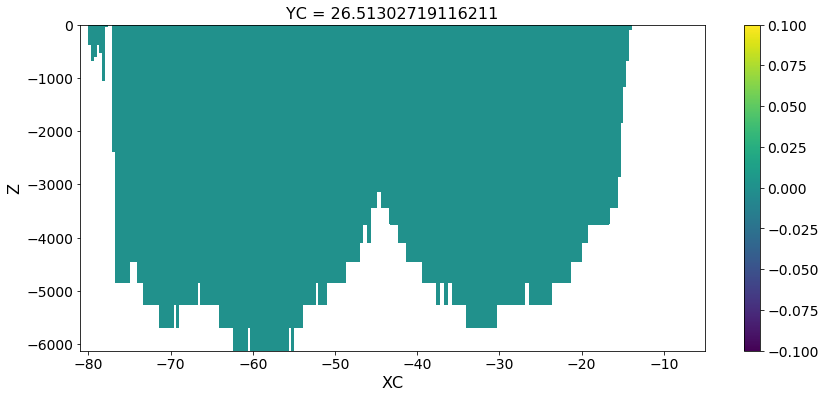

In [25]:
(ds_c.isel(YC=1).salt - ds_c.where(ds_c.Z>ds_c.depth).isel(YC=1).salt_l).plot()

In [26]:
def nearest_c_to_f(dataarray, x,y,x_fine,y_fine):
    xx,yy = np.meshgrid(x,y)
    xx_fine,yy_fine = np.meshgrid(x_fine,y_fine)
    assert xx.shape == dataarray.shape
    assert yy.shape == dataarray.shape
    data = dataarray.ravel()[~np.isnan(dataarray.ravel())]
    xpts = xx.ravel()[~np.isnan(dataarray.ravel())]
    ypts = yy.ravel()[~np.isnan(dataarray.ravel())]
    
    
    data_filled = griddata((xpts, ypts), data, (xx_fine,yy_fine), method='nearest',rescale=True)
    return data_filled

In [27]:
Salt_noland_fh = np.zeros((z.shape[0],ds0.Depth.shape[0],ds0.Depth.shape[1]))
Theta_noland_fh = np.zeros((z.shape[0],ds0.Depth.shape[0], ds0.Depth.shape[1]))
U_noland_fh = np.zeros((z.shape[0],ds0.Depth.shape[0], ds0.Depth.shape[1]))
V_noland_fh = np.zeros((z.shape[0],ds0.Depth.shape[0], ds0.Depth.shape[1]))
Salt_nolandx_fh = np.zeros((z.shape[0],ds0.Depth.shape[0],ds0.Depth.shape[1]))
Theta_nolandx_fh = np.zeros((z.shape[0],ds0.Depth.shape[0], ds0.Depth.shape[1]))
U_nolandx_fh = np.zeros((z.shape[0],ds0.Depth.shape[0], ds0.Depth.shape[1]))
V_nolandx_fh = np.zeros((z.shape[0],ds0.Depth.shape[0], ds0.Depth.shape[1]))

for i in range(len(Salt_noland)):
    fSh = interp2d(xc,yc, Salt_noland[i], kind='linear')
    fTh = interp2d(xc,yc, Theta_noland[i], kind='linear')
    fUh = interp2d(xg,yc, U_noland[i], kind='linear')
    fVh = interp2d(xc,yg, V_noland[i], kind='linear')
    fxSh = interp2d(xc,yc, Salt_nolandx[i], kind='linear')
    fxTh = interp2d(xc,yc, Theta_nolandx[i], kind='linear')
    fxUh = interp2d(xg,yc, U_nolandx[i], kind='linear')
    fxVh = interp2d(xc,yg, V_nolandx[i], kind='linear')
    
    Salt_noland_fh[i] = fSh(xc_fine, yc_fine)
    Theta_noland_fh[i] = fTh(xc_fine, yc_fine)
    U_noland_fh[i] = fUh(xg_fine, yc_fine)
    V_noland_fh[i] = fVh(xc_fine, yg_fine)
    Salt_nolandx_fh[i] = fxSh(xc_fine, yc_fine)
    Theta_nolandx_fh[i] = fxTh(xc_fine, yc_fine)
    U_nolandx_fh[i] = fxUh(xg_fine, yc_fine)
    V_nolandx_fh[i] = fxVh(xc_fine, yg_fine)

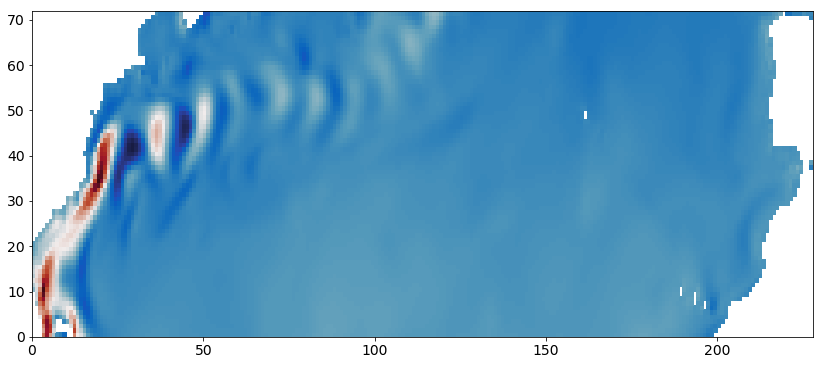

In [28]:
plt.pcolormesh(V[0], cmap=cmocean.cm.balance)

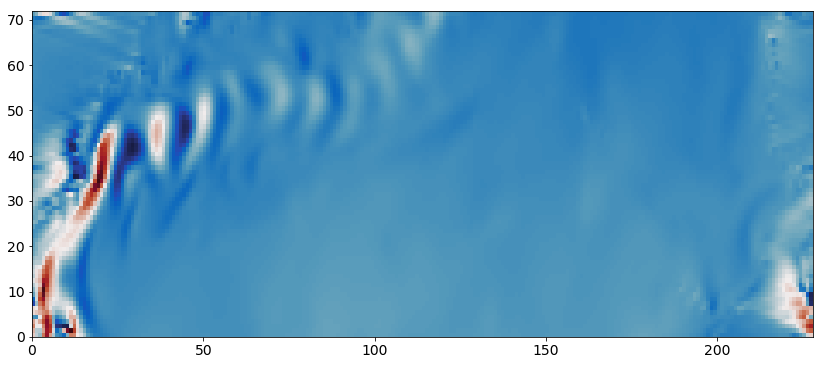

In [29]:
plt.pcolormesh(V_nolandx[0], cmap=cmocean.cm.balance)

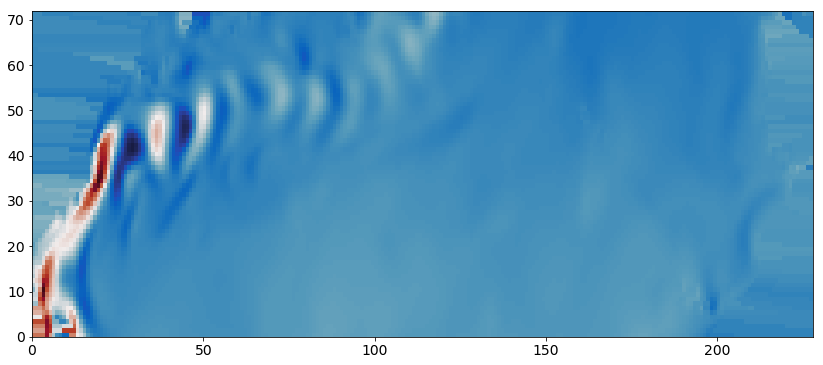

In [30]:
plt.pcolormesh(V_noland[0], cmap=cmocean.cm.balance)

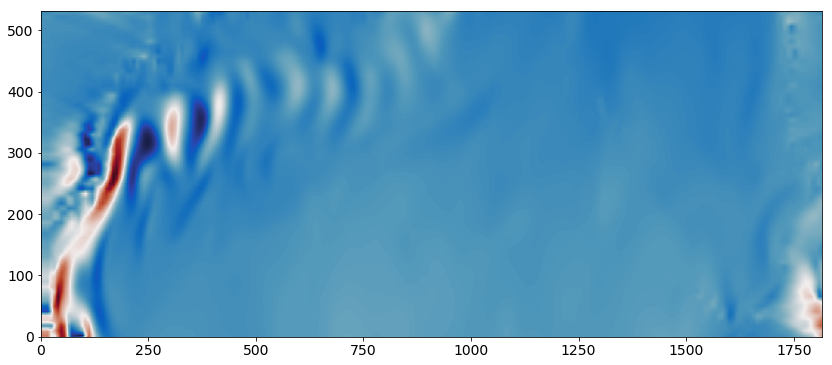

In [31]:
plt.pcolormesh(V_nolandx_fh[0], cmap=cmocean.cm.balance)

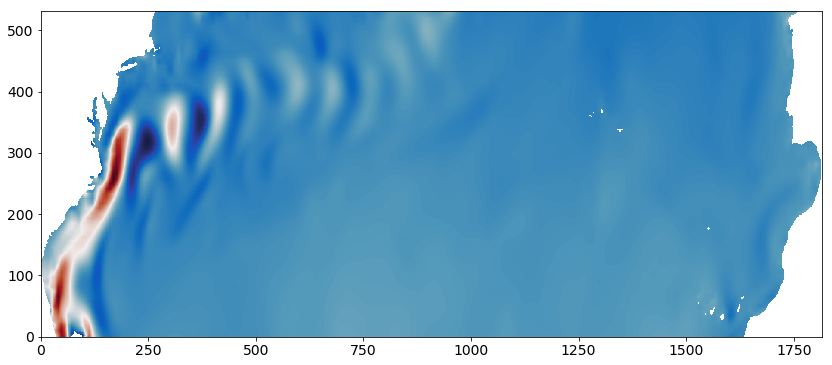

In [32]:
plt.pcolormesh(np.ma.masked_where(ds0.Depth.values==0, V_nolandx_fh[0]), cmap=cmocean.cm.balance)

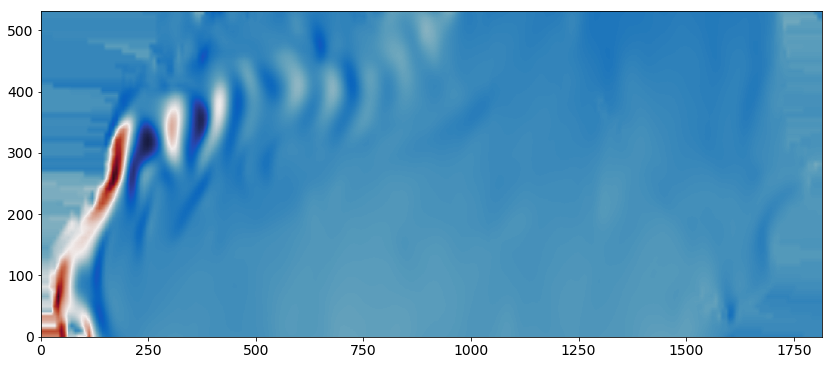

In [33]:
plt.pcolormesh(V_noland_fh[0], cmap=cmocean.cm.balance)

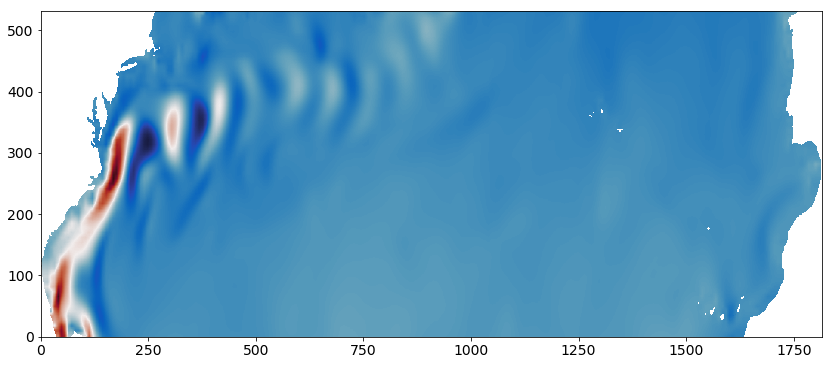

In [34]:
plt.pcolormesh(np.ma.masked_where(ds0.Depth.values==0, V_noland_fh[0]), cmap=cmocean.cm.balance)

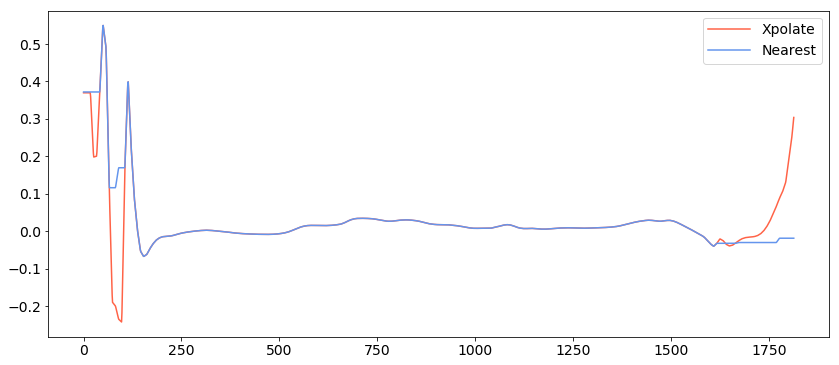

In [35]:

plt.plot(V_nolandx_fh[0,2], color=color1, label='Xpolate')
plt.plot(V_noland_fh[0,2], color=color2, label='Nearest')
plt.legend()

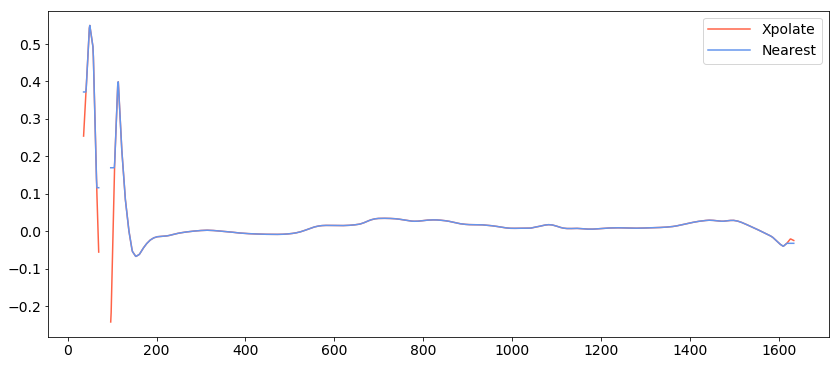

In [36]:
Vxt = np.ma.masked_where(ds0.Depth.values==0, V_nolandx_fh[0])
Vt = np.ma.masked_where(ds0.Depth.values==0, V_noland_fh[0])
plt.plot(Vxt[2], color=color1, label='Xpolate')
plt.plot(Vt[2], color=color2, label='Nearest')
plt.legend()

In [37]:
Salt_noland_f = np.zeros((z_fine.shape[0],ds0.Depth.shape[0], ds0.Depth.shape[1]))
Theta_noland_f = np.zeros((z_fine.shape[0],ds0.Depth.shape[0], ds0.Depth.shape[1]))
U_noland_f = np.zeros((z_fine.shape[0],ds0.Depth.shape[0], ds0.Depth.shape[1]))
V_noland_f = np.zeros((z_fine.shape[0],ds0.Depth.shape[0], ds0.Depth.shape[1]))
Salt_nolandx_f = np.zeros((z_fine.shape[0],ds0.Depth.shape[0], ds0.Depth.shape[1]))
Theta_nolandx_f = np.zeros((z_fine.shape[0],ds0.Depth.shape[0], ds0.Depth.shape[1]))
U_nolandx_f = np.zeros((z_fine.shape[0],ds0.Depth.shape[0], ds0.Depth.shape[1]))
V_nolandx_f = np.zeros((z_fine.shape[0],ds0.Depth.shape[0], ds0.Depth.shape[1]))
for i in range(Salt_noland_fh.shape[1]):
    fS = interp2d(xc_fine,z, Salt_noland_fh[:,i], kind='linear')
    Salt_noland_f[:,i] = np.flipud(fS(xc_fine, z_fine))
    
    fT = interp2d(xc_fine,z, Theta_noland_fh[:,i], kind='linear')
    Theta_noland_f[:,i] = np.flipud(fT(xc_fine, z_fine))
    
    fU = interp2d(xg_fine,z, U_noland_fh[:,i], kind='linear')
    U_noland_f[:,i] = np.flipud(fU(xg_fine, z_fine))
    
    fV = interp2d(xc_fine,z, V_noland_fh[:,i], kind='linear')
    V_noland_f[:,i] = np.flipud(fV(xc_fine, z_fine))
    
    fxS = interp2d(xc_fine,z, Salt_nolandx_fh[:,i], kind='linear')
    Salt_nolandx_f[:,i] = np.flipud(fxS(xc_fine, z_fine))
    
    fxT = interp2d(xc_fine,z, Theta_nolandx_fh[:,i], kind='linear')
    Theta_nolandx_f[:,i] = np.flipud(fxT(xc_fine, z_fine))
    
    fxU = interp2d(xg_fine,z, U_nolandx_fh[:,i], kind='linear')
    U_nolandx_f[:,i] = np.flipud(fxU(xg_fine, z_fine))
    
    fxV = interp2d(xc_fine,z, V_nolandx_fh[:,i], kind='linear')
    V_nolandx_f[:,i] = np.flipud(fxV(xc_fine, z_fine))
    
    

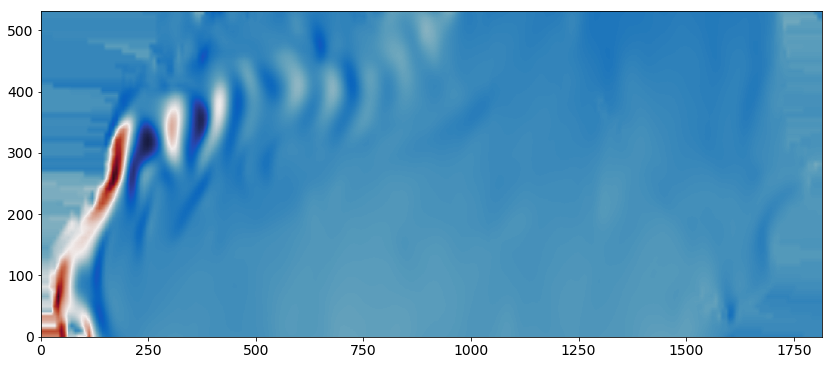

In [38]:
plt.pcolormesh(V_noland_f[0], cmap=cmocean.cm.balance)

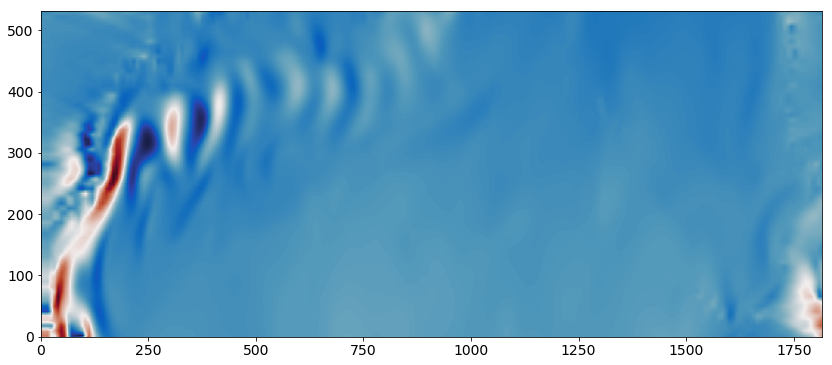

In [39]:
plt.pcolormesh(V_nolandx_f[0], cmap=cmocean.cm.balance)

In [40]:
salt_noland_f = xr.DataArray(Salt_noland_f, coords={'Z': z_fine,'YC': yc_fine, 'XC': xc_fine},
             dims=['Z','YC','XC'])
theta_noland_f = xr.DataArray(Theta_noland_f, coords={'Z': z_fine,'YC': yc_fine, 'XC': xc_fine},
             dims=['Z','YC','XC'])
u_noland_f = xr.DataArray(U_noland_f, coords={'Z': z_fine,'YC': yc_fine, 'XG': xg_fine},
             dims=['Z','YC','XG'])
v_noland_f = xr.DataArray(V_noland_f, coords={'Z': z_fine,'YG': yg_fine, 'XC': xc_fine},
             dims=['Z','YG','XC'])
salt_nolandx_f = xr.DataArray(Salt_nolandx_f, coords={'Z': z_fine,'YC': yc_fine, 'XC': xc_fine},
             dims=['Z','YC','XC'])
theta_nolandx_f = xr.DataArray(Theta_nolandx_f, coords={'Z': z_fine,'YC': yc_fine, 'XC': xc_fine},
             dims=['Z','YC','XC'])
u_nolandx_f = xr.DataArray(U_nolandx_f, coords={'Z': z_fine,'YC': yc_fine, 'XG': xg_fine},
             dims=['Z','YC','XG'])
v_nolandx_f = xr.DataArray(V_nolandx_f, coords={'Z': z_fine,'YG': yg_fine, 'XC': xc_fine},
             dims=['Z','YG','XC'])

ds_f = xr.Dataset({'Salt_l': salt_noland_f,
                   'Theta_l': theta_noland_f,
                   'U_l': u_noland_f,
                   'V_l': v_noland_f,
                   'Salt_x': salt_nolandx_f,
                   'Theta_x': theta_nolandx_f,
                   'U_x': u_nolandx_f,
                   'V_x': v_nolandx_f,})
ds_f

<xarray.Dataset>
Dimensions:  (XC: 1815, XG: 1815, YC: 532, YG: 532, Z: 100)
Coordinates:
  * Z        (Z) >f4 -2.5 -7.5 -12.5 -17.5 ... -5568.185 -5790.69 -6018.94
  * YC       (YC) >f4 26.87238 26.906544 26.9407 ... 43.428173 43.456318
  * XC       (XC) >f4 -81.5625 -81.520836 -81.47917 ... -6.020836 -5.9791694
  * XG       (XG) >f4 -81.583336 -81.54167 -81.5 ... -6.0416694 -6.0000024
  * YG       (YG) >f4 26.855293 26.889463 26.923624 ... 43.414097 43.44225
Data variables:
    Salt_l   (Z, YC, XC) float64 36.07 36.07 36.07 36.07 ... 34.87 34.87 34.87
    Theta_l  (Z, YC, XC) float64 25.26 25.26 25.26 25.26 ... 1.622 1.622 1.622
    U_l      (Z, YC, XG) float64 -0.03448 -0.03448 ... -1.74e-06 -1.74e-06
    V_l      (Z, YG, XC) float64 0.3607 0.3607 0.3607 ... -0.0005918 -0.0005918
    Salt_x   (Z, YC, XC) float64 35.87 35.87 35.87 ... -0.03567 -0.03631
    Theta_x  (Z, YC, XC) float64 24.12 24.12 24.12 ... -0.001557 -0.001584
    U_x      (Z, YC, XG) float64 0.04025 0.04025 0.04025 .

In [41]:
depths = ['depth', 'depth_u', 'depth_v']
x0 = ['XC','XG','XC']
y0 = ['YC','YC','YG']
depths_c = {}
for it, v in enumerate(depths):
    
    depths_c[v] = nearest_c_to_f(ds_c[v].values, ds_c[x0[it]].values,ds_c[y0[it]].values,ds_f[x0[it]].values,ds_f[y0[it]].values)
    ds_f[v+'_c'] = xr.DataArray(depths_c[v], coords={y0[it] : ds_f[y0[it]].values, x0[it] : ds_f[x0[it]].values},
                          dims=[y0[it],x0[it]])

ds_f

<xarray.Dataset>
Dimensions:    (XC: 1815, XG: 1815, YC: 532, YG: 532, Z: 100)
Coordinates:
  * Z          (Z) >f4 -2.5 -7.5 -12.5 -17.5 ... -5568.185 -5790.69 -6018.94
  * YC         (YC) >f4 26.87238 26.906544 26.9407 ... 43.428173 43.456318
  * XC         (XC) >f4 -81.5625 -81.520836 -81.47917 ... -6.020836 -5.9791694
  * XG         (XG) >f4 -81.583336 -81.54167 -81.5 ... -6.0416694 -6.0000024
  * YG         (YG) >f4 26.855293 26.889463 26.923624 ... 43.414097 43.44225
Data variables:
    Salt_l     (Z, YC, XC) float64 36.07 36.07 36.07 36.07 ... 34.87 34.87 34.87
    Theta_l    (Z, YC, XC) float64 25.26 25.26 25.26 25.26 ... 1.622 1.622 1.622
    U_l        (Z, YC, XG) float64 -0.03448 -0.03448 ... -1.74e-06 -1.74e-06
    V_l        (Z, YG, XC) float64 0.3607 0.3607 ... -0.0005918 -0.0005918
    Salt_x     (Z, YC, XC) float64 35.87 35.87 35.87 ... -0.03567 -0.03631
    Theta_x    (Z, YC, XC) float64 24.12 24.12 24.12 ... -0.001557 -0.001584
    U_x        (Z, YC, XG) float64 0.0402

In [42]:
f_u_f =  interp2d(xc_fine,yc_fine, ds0.Depth.values*-1, kind='linear')
depth_u_f = f_u_f(xg_fine, yc_fine)
f_v_f =  interp2d(xc_fine,yc_fine, ds0.Depth.values*-1, kind='linear')
depth_v_f = f_v_f(xc_fine, yg_fine)

In [43]:
ds_f['depth'] = xr.DataArray(ds0.Depth.values*-1, coords=ds_f.depth_c.coords, dims = ds_f.depth_c.dims)
ds_f['depth_u'] = xr.DataArray(depth_u_f, coords=ds_f.depth_u_c.coords, dims = ds_f.depth_u_c.dims)
ds_f['depth_v'] = xr.DataArray(depth_v_f, coords=ds_f.depth_v_c.coords, dims = ds_f.depth_v_c.dims)


In [44]:
ds_f['dxC'] = xr.DataArray(ds0.dxC.values, coords=ds_f.depth_u_c.coords, dims = ds_f.depth_u_c.dims)
ds_f['dyG'] = xr.DataArray(ds0.dyG.values, coords=ds_f.depth_u_c.coords, dims = ds_f.depth_u_c.dims)
ds_f['dxG'] = xr.DataArray(ds0.dxG.values, coords=ds_f.depth_v_c.coords, dims = ds_f.depth_v_c.dims)
ds_f['dyC'] = xr.DataArray(ds0.dyC.values, coords=ds_f.depth_v_c.coords, dims = ds_f.depth_v_c.dims)
ds_f['dZ'] = xr.DataArray(ds0.drF.values, coords={'Z':ds_f.Z.values}, dims = ['Z'])

In [45]:
ds_f_n = ds_f.isel(YC=-2,YG=-2)
ds_f_s = ds_f.isel(YC=2,YG=2)

In [46]:
ds_f_n

<xarray.Dataset>
Dimensions:    (XC: 1815, XG: 1815, Z: 100)
Coordinates:
  * Z          (Z) >f4 -2.5 -7.5 -12.5 -17.5 ... -5568.185 -5790.69 -6018.94
    YC         >f4 43.428173
  * XC         (XC) >f4 -81.5625 -81.520836 -81.47917 ... -6.020836 -5.9791694
  * XG         (XG) >f4 -81.583336 -81.54167 -81.5 ... -6.0416694 -6.0000024
    YG         >f4 43.414097
Data variables:
    Salt_l     (Z, XC) float64 32.21 32.21 32.21 32.21 ... 34.87 34.87 34.87
    Theta_l    (Z, XC) float64 4.111 4.111 4.111 4.111 ... 1.622 1.622 1.622
    U_l        (Z, XG) float64 -0.008197 -0.008197 ... -1.74e-06 -1.74e-06
    V_l        (Z, XC) float64 -0.01357 -0.01357 ... -0.0005918 -0.0005918
    Salt_x     (Z, XC) float64 34.91 34.91 34.91 ... -0.03503 -0.03565 -0.03627
    Theta_x    (Z, XC) float64 11.82 11.82 11.82 ... -0.001556 -0.001583
    U_x        (Z, XG) float64 0.04396 0.04396 0.04396 ... 4.558e-07 4.632e-07
    V_x        (Z, XC) float64 -0.01375 -0.01375 ... -5.421e-08 -5.181e-08
    dept

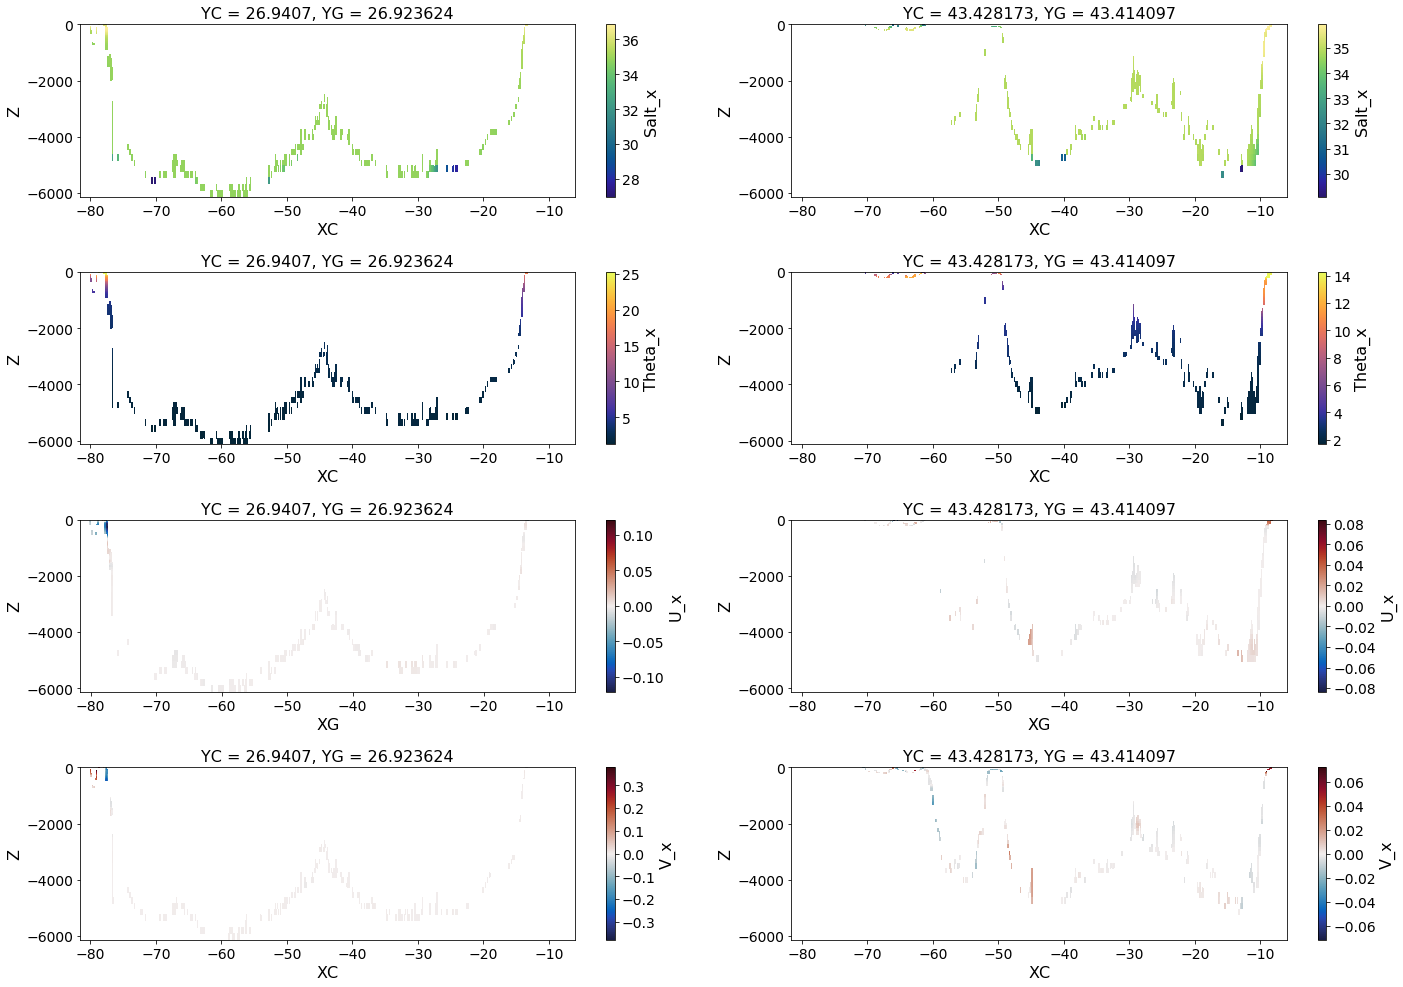

In [52]:
plt.figure(figsize=(20, 14))

plt.subplot(421)
ds_f_s.where(ds_f_s.Z>ds_f_s.depth_c).where(ds_f_s.Z<ds_f_s.depth).Salt_x.plot(cmap=cmocean.cm.haline)
plt.subplot(423)
ds_f_s.where(ds_f_s.Z>ds_f_s.depth_c).where(ds_f_s.Z<ds_f_s.depth).Theta_x.plot(cmap=cmocean.cm.thermal)
plt.subplot(425)
ds_f_s.where(ds_f_s.Z>ds_f_s.depth_u_c).where(ds_f_s.Z<ds_f_s.depth_u).U_x.plot(cmap=cmocean.cm.balance)
plt.subplot(427)
ds_f_s.where(ds_f_s.Z>ds_f_s.depth_v_c).where(ds_f_s.Z<ds_f_s.depth_v).V_x.plot(cmap=cmocean.cm.balance)

plt.subplot(422)
ds_f_n.where(ds_f_n.Z>ds_f_n.depth_c).where(ds_f_n.Z<ds_f_n.depth).Salt_x.plot(cmap=cmocean.cm.haline)
plt.subplot(424)
ds_f_n.where(ds_f_n.Z>ds_f_n.depth_c).where(ds_f_n.Z<ds_f_n.depth).Theta_x.plot(cmap=cmocean.cm.thermal)
plt.subplot(426)
ds_f_n.where(ds_f_n.Z>ds_f_n.depth_u_c).where(ds_f_n.Z<ds_f_n.depth_u).U_x.plot(cmap=cmocean.cm.balance)
plt.subplot(428)
ds_f_n.where(ds_f_n.Z>ds_f_n.depth_v_c).where(ds_f_n.Z<ds_f_n.depth_v).V_x.plot(cmap=cmocean.cm.balance)

plt.tight_layout()

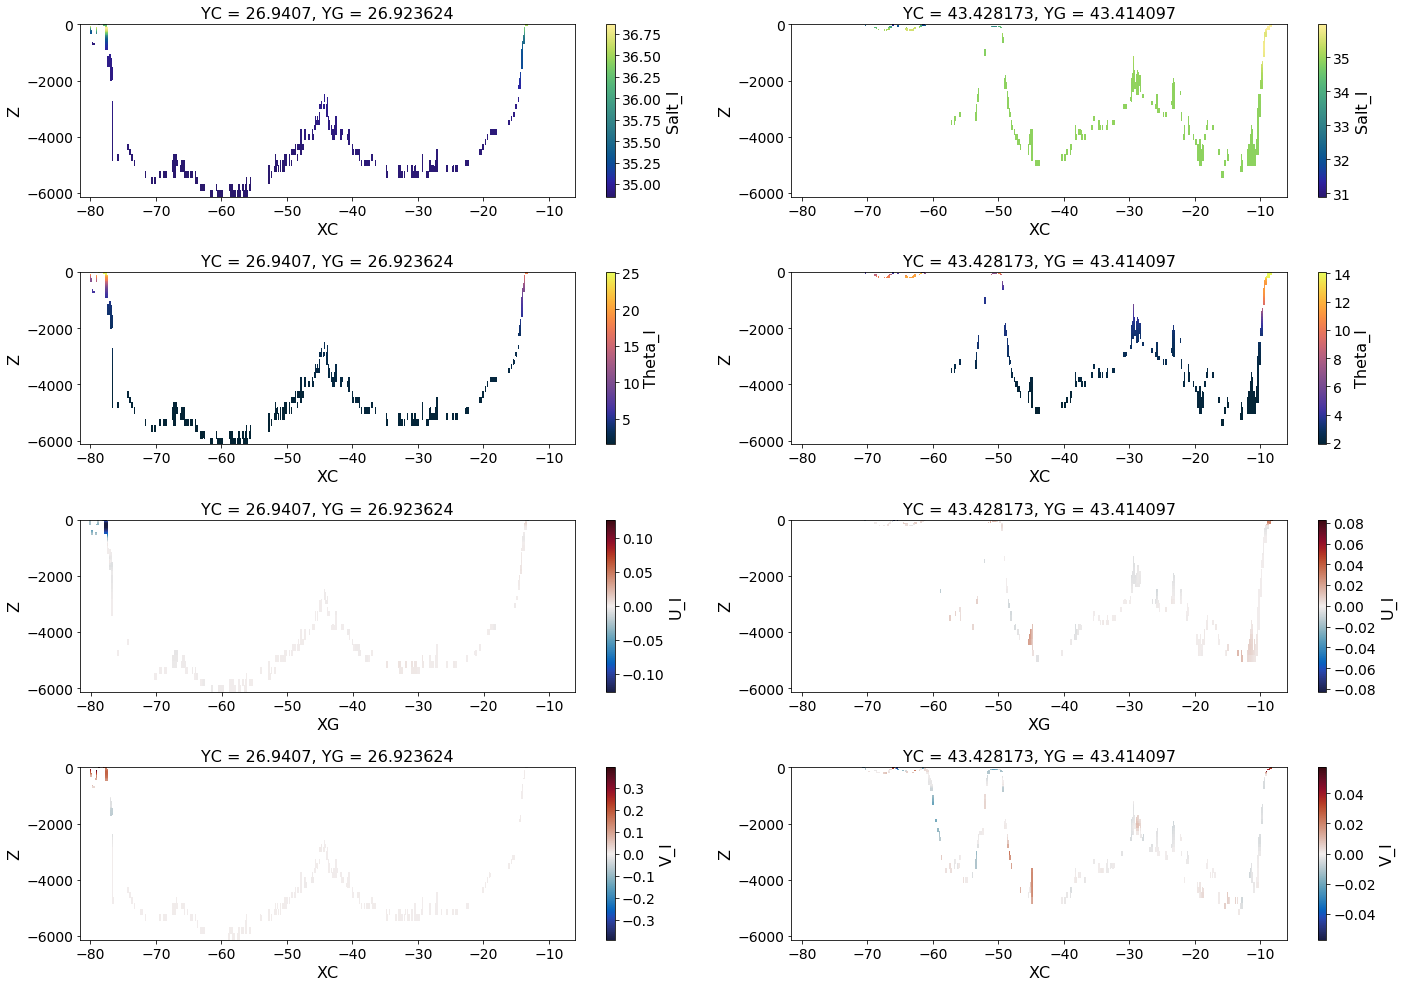

In [53]:
plt.figure(figsize=(20, 14))
plt.subplot(421)
ds_f_s.where(ds_f_s.Z>ds_f_s.depth_c).where(ds_f_s.Z<ds_f_s.depth).Salt_l.plot(cmap=cmocean.cm.haline)
plt.subplot(423)
ds_f_s.where(ds_f_s.Z>ds_f_s.depth_c).where(ds_f_s.Z<ds_f_s.depth).Theta_l.plot(cmap=cmocean.cm.thermal)
plt.subplot(425)
ds_f_s.where(ds_f_s.Z>ds_f_s.depth_u_c).where(ds_f_s.Z<ds_f_s.depth_u).U_l.plot(cmap=cmocean.cm.balance)
plt.subplot(427)
ds_f_s.where(ds_f_s.Z>ds_f_s.depth_v_c).where(ds_f_s.Z<ds_f_s.depth_v).V_l.plot(cmap=cmocean.cm.balance)

plt.subplot(422)
ds_f_n.where(ds_f_n.Z>ds_f_n.depth_c).where(ds_f_n.Z<ds_f_n.depth).Salt_l.plot(cmap=cmocean.cm.haline)
plt.subplot(424)
ds_f_n.where(ds_f_n.Z>ds_f_n.depth_c).where(ds_f_n.Z<ds_f_n.depth).Theta_l.plot(cmap=cmocean.cm.thermal)
plt.subplot(426)
ds_f_n.where(ds_f_n.Z>ds_f_n.depth_u_c).where(ds_f_n.Z<ds_f_n.depth_u).U_l.plot(cmap=cmocean.cm.balance)
plt.subplot(428)
ds_f_n.where(ds_f_n.Z>ds_f_n.depth_v_c).where(ds_f_n.Z<ds_f_n.depth_v).V_l.plot(cmap=cmocean.cm.balance)



plt.tight_layout()

In [47]:
%%time
variables = ['Salt_l','Theta_l','U_l','V_l','Salt_x','Theta_x','U_x','V_x']
dx = ['dxG','dxG','dxC','dxG','dxG','dxG','dxC','dxG']
dpth = ['depth','depth','depth_u','depth','depth','depth','depth_u','depth']

for it, v in enumerate(variables):
    
    ds_f_s[v+'_cf'] = ds_f_s.where(ds_f_s.Z<ds_f_s[dpth[it]+'_c']).where(ds_f_s.Z>ds_f_s[dpth[it]])[v] 
    ds_f_n[v+'_cf'] = ds_f_n.where(ds_f_n.Z<ds_f_n[dpth[it]+'_c']).where(ds_f_n.Z>ds_f_n[dpth[it]])[v] 
    
    ds_f_s[v+'_c'] = ds_f_s.where(ds_f_s.Z>ds_f_s[dpth[it]+'_c'])[v] 
    ds_f_n[v+'_c'] = ds_f_n.where(ds_f_n.Z>ds_f_n[dpth[it]+'_c'])[v]
    ds_f_s[v+'_f'] = ds_f_s.where(ds_f_s.Z>ds_f_s[dpth[it]])[v] 
    ds_f_n[v+'_f'] = ds_f_n.where(ds_f_n.Z>ds_f_n[dpth[it]])[v]

CPU times: user 5min 27s, sys: 6min 14s, total: 11min 42s
Wall time: 12min 15s


In [48]:
%%time
for it, v in enumerate(variables):
    ds_f_s[v+'_c'+'_di'] = (ds_f_s[v+'_c']* ds_f_s[dx[it]] * ds_f_s.dZ).sum(dim='Z')
    ds_f_n[v+'_c'+'_di'] = (ds_f_n[v+'_c']* ds_f_n[dx[it]] * ds_f_n.dZ).sum(dim='Z')
    ds_f_s[v+'_f'+'_di'] = (ds_f_s[v+'_f']* ds_f_s[dx[it]] * ds_f_s.dZ).sum(dim='Z') 
    ds_f_n[v+'_f'+'_di'] = (ds_f_n[v+'_f']* ds_f_n[dx[it]] * ds_f_n.dZ).sum(dim='Z')
    ds_f_s[v+'_di'] = (ds_f_s[v+'_cf'] * ds_f_s[dx[it]] * ds_f_s.dZ).sum(dim='Z')
    ds_f_n[v+'_di'] = (ds_f_n[v+'_cf'] * ds_f_n[dx[it]] * ds_f_n.dZ).sum(dim='Z')

CPU times: user 172 ms, sys: 0 ns, total: 172 ms
Wall time: 183 ms


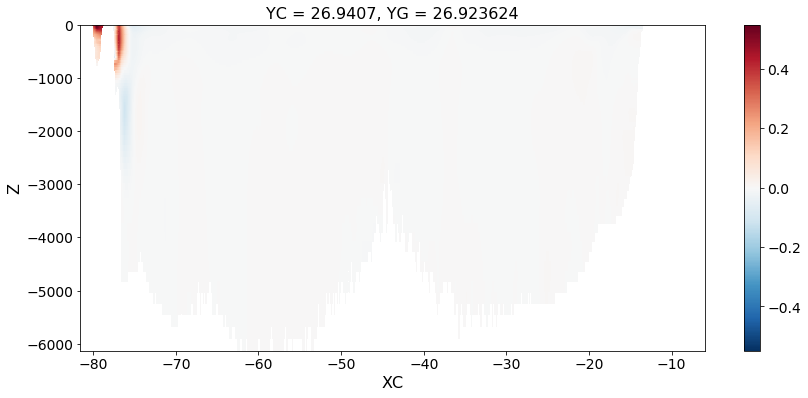

In [49]:
(0.5*(ds_f_s.V_x_f + ds_f_s.V_l_f)).plot()

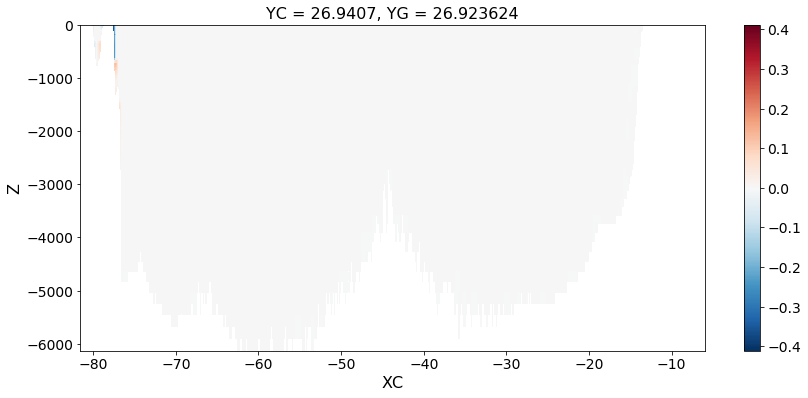

In [50]:
(ds_f_s.V_x_f - ds_f_s.V_l_f).plot()

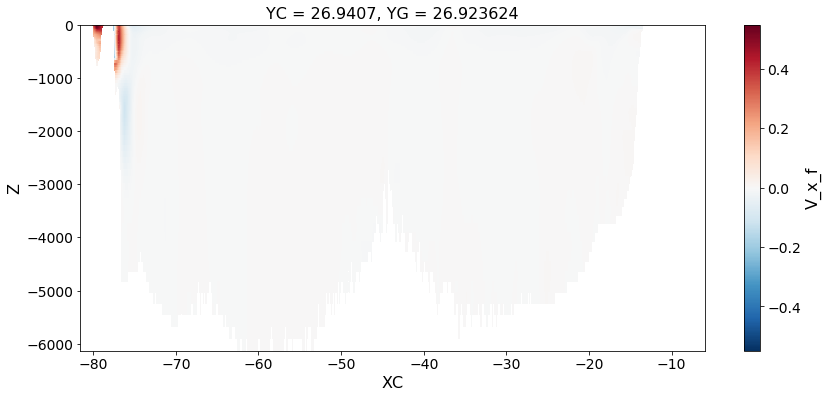

In [51]:
ds_f_s.V_x_f.plot()

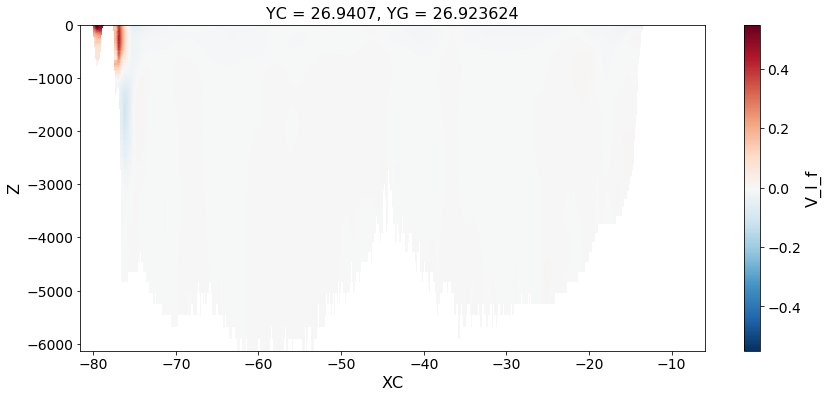

In [52]:
ds_f_s.V_l_f.plot()

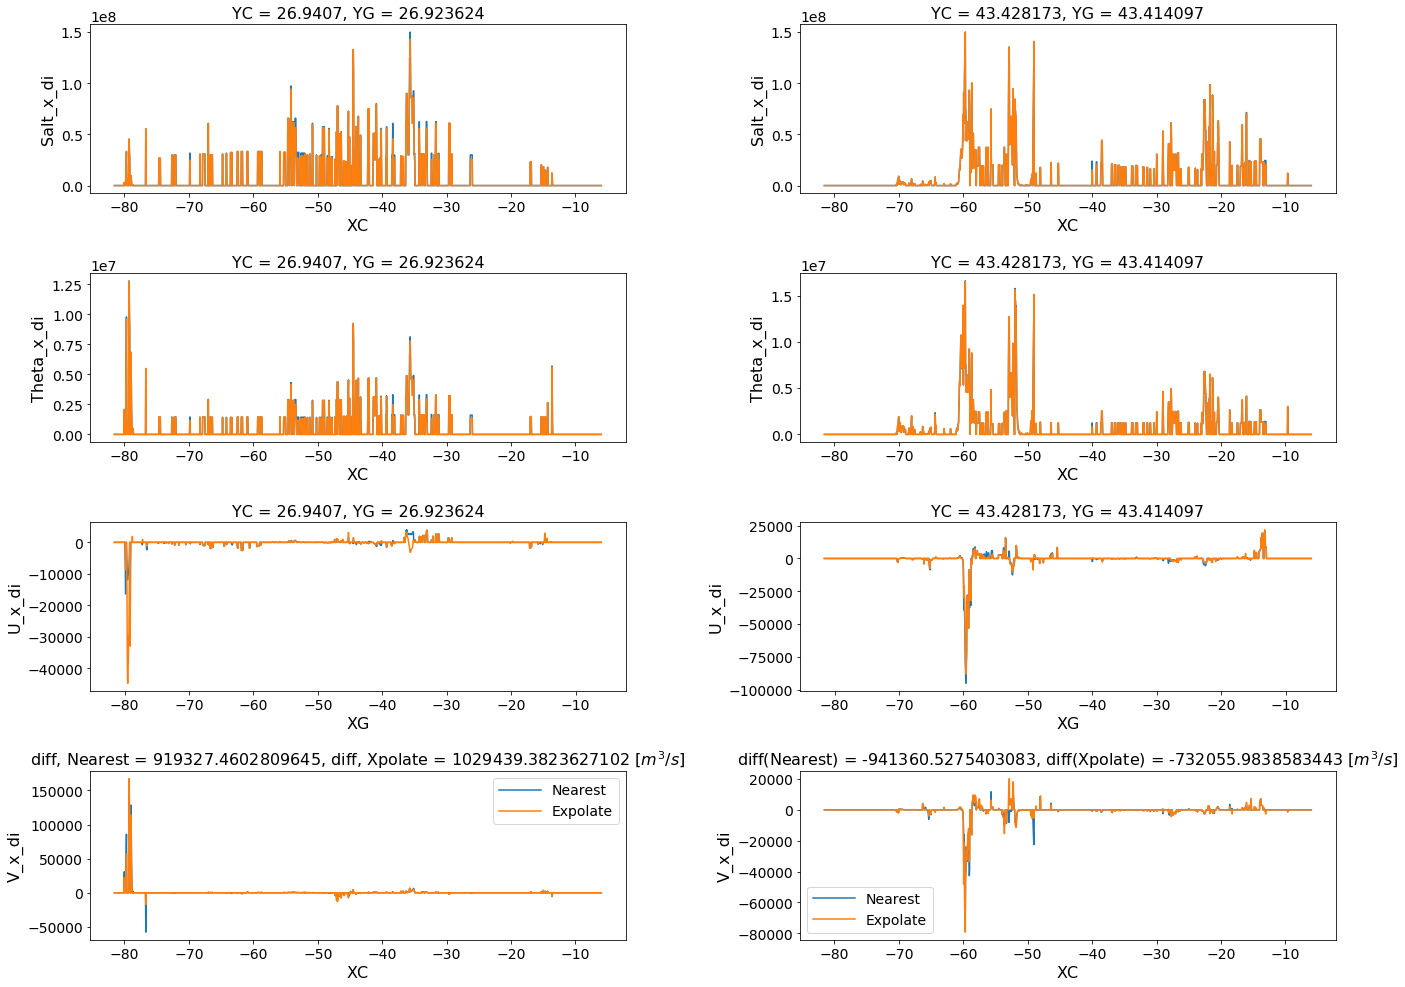

In [53]:
plt.figure(figsize=(20,14))
plt.subplot(421)
ds_f_s.Salt_l_di.plot(label='Nearest')
ds_f_s.Salt_x_di.plot(label='Expolate')

plt.subplot(423)
ds_f_s.Theta_l_di.plot(label='Nearest')
ds_f_s.Theta_x_di.plot(label='Expolate')

plt.subplot(425)
ds_f_s.U_l_di.plot(label='Nearest')
ds_f_s.U_x_di.plot(label='Expolate')

plt.subplot(427)
ds_f_s.V_l_di.plot(label='Nearest')
ds_f_s.V_x_di.plot(label='Expolate')

plt.title(r'diff, Nearest = %s, diff, Xpolate = %s [$m^3/s$]' %(ds_f_s.V_l_di.sum().values,ds_f_s.V_x_di.sum().values))
plt.legend()

plt.subplot(422)
ds_f_n.Salt_l_di.plot(label='Nearest')
ds_f_n.Salt_x_di.plot(label='Expolate')

plt.subplot(424)
ds_f_n.Theta_l_di.plot(label='Nearest')
ds_f_n.Theta_x_di.plot(label='Expolate')

plt.subplot(426)
ds_f_n.U_l_di.plot(label='Nearest')
ds_f_n.U_x_di.plot(label='Expolate')

plt.subplot(428)
ds_f_n.V_l_di.plot(label='Nearest')
ds_f_n.V_x_di.plot(label='Expolate')

plt.title(r'diff(Nearest) = %s, diff(Xpolate) = %s [$m^3/s$]' %(ds_f_n.V_l_di.sum().values,ds_f_n.V_x_di.sum().values))

plt.legend()
plt.tight_layout()

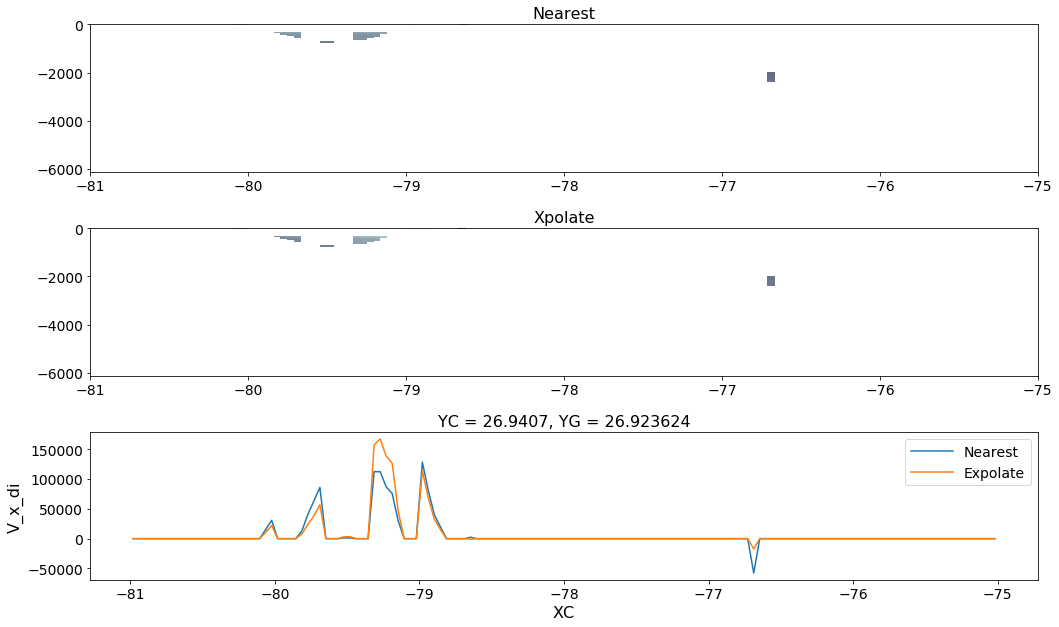

In [54]:
plt.figure(figsize=(15,9))
plt.subplot(311)
ds_f_s.V_l_cf.sel(XC=slice(-81,-75)).plot(label='Nearest', cmap='bone', add_labels=False, add_colorbar = False)
plt.title('Nearest')
plt.subplot(312)
ds_f_s.V_x_cf.sel(XC=slice(-81,-75)).plot(label='Nearest', cmap='bone', add_labels=False, add_colorbar = False)
plt.title('Xpolate')

plt.subplot(313)
ds_f_s.V_l_di.sel(XC=slice(-81,-75)).plot(label='Nearest')
ds_f_s.V_x_di.sel(XC=slice(-81,-75)).plot(label='Expolate')
plt.legend()
plt.tight_layout()

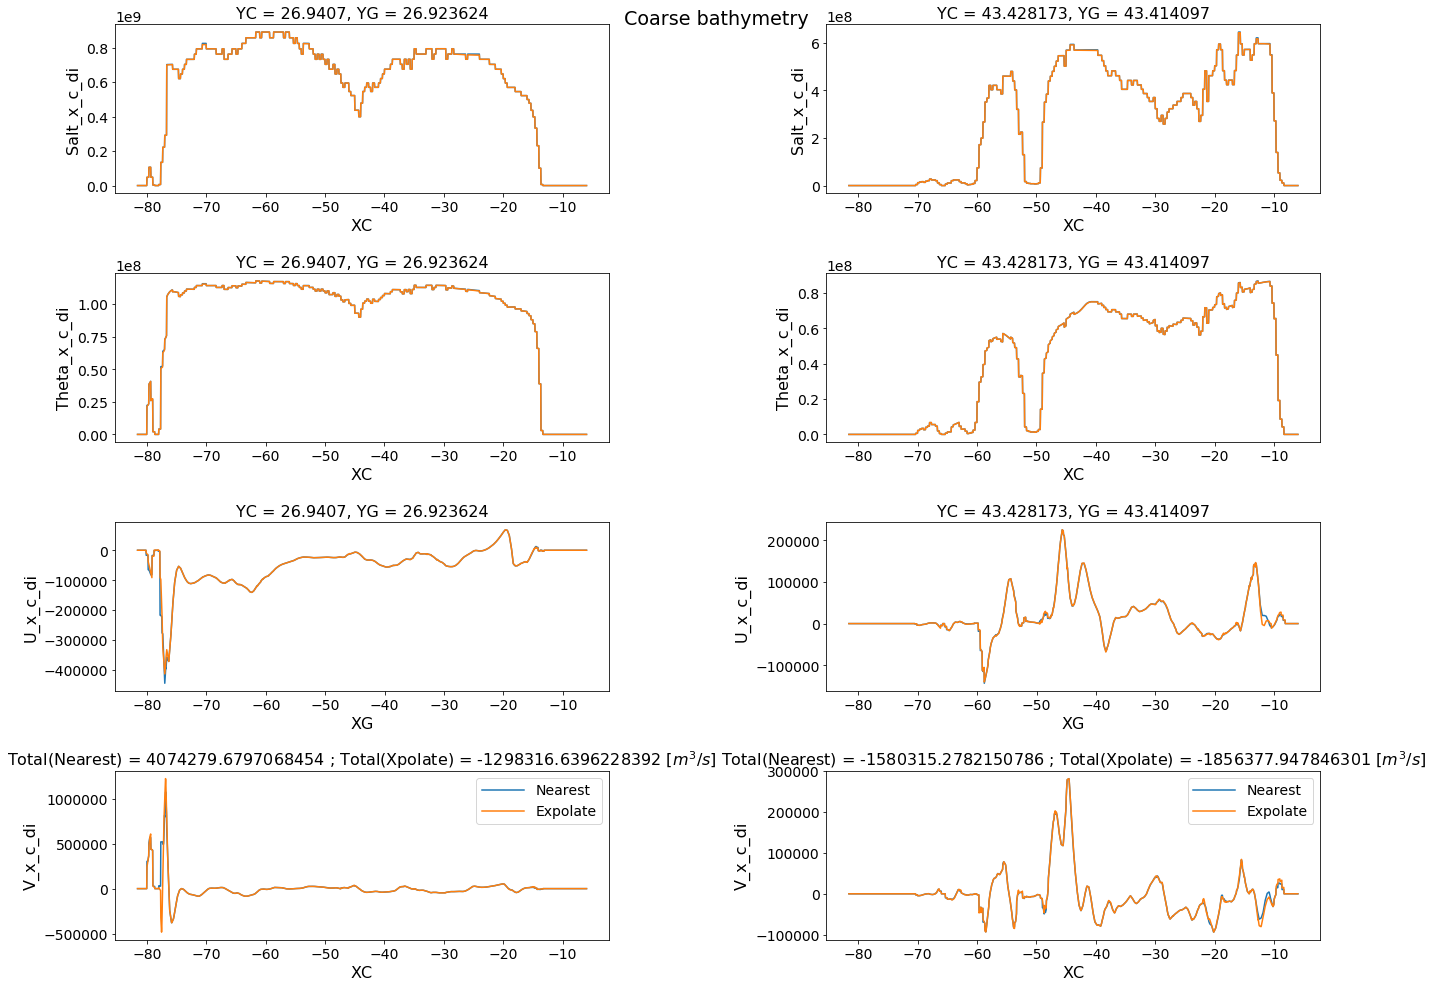

In [55]:
plt.figure(figsize=(20,14))
plt.subplot(421)
ds_f_s.Salt_l_c_di.plot(label='Nearest')
ds_f_s.Salt_x_c_di.plot(label='Expolate')

plt.subplot(423)
ds_f_s.Theta_l_c_di.plot(label='Nearest')
ds_f_s.Theta_x_c_di.plot(label='Expolate')

plt.subplot(425)
ds_f_s.U_l_c_di.plot(label='Nearest')
ds_f_s.U_x_c_di.plot(label='Expolate')

plt.subplot(427)
ds_f_s.V_l_c_di.plot(label='Nearest')
ds_f_s.V_x_c_di.plot(label='Expolate')
plt.legend()

plt.title(r'Total(Nearest) = %s ; Total(Xpolate) = %s [$m^3/s$]' %(ds_f_s.V_l_c_di.sum().values,ds_f_s.V_x_c_di.sum().values))

plt.subplot(422)
ds_f_n.Salt_l_c_di.plot(label='Nearest')
ds_f_n.Salt_x_c_di.plot(label='Expolate')

plt.subplot(424)
ds_f_n.Theta_l_c_di.plot(label='Nearest')
ds_f_n.Theta_x_c_di.plot(label='Expolate')

plt.subplot(426)
ds_f_n.U_l_c_di.plot(label='Nearest')
ds_f_n.U_x_c_di.plot(label='Expolate')

plt.subplot(428)
ds_f_n.V_l_c_di.plot(label='Nearest')
ds_f_n.V_x_c_di.plot(label='Expolate')
plt.legend()

plt.title(r'Total(Nearest) = %s ; Total(Xpolate) = %s [$m^3/s$]' %(ds_f_n.V_l_c_di.sum().values,ds_f_n.V_x_c_di.sum().values))

plt.suptitle('Coarse bathymetry')
plt.tight_layout()

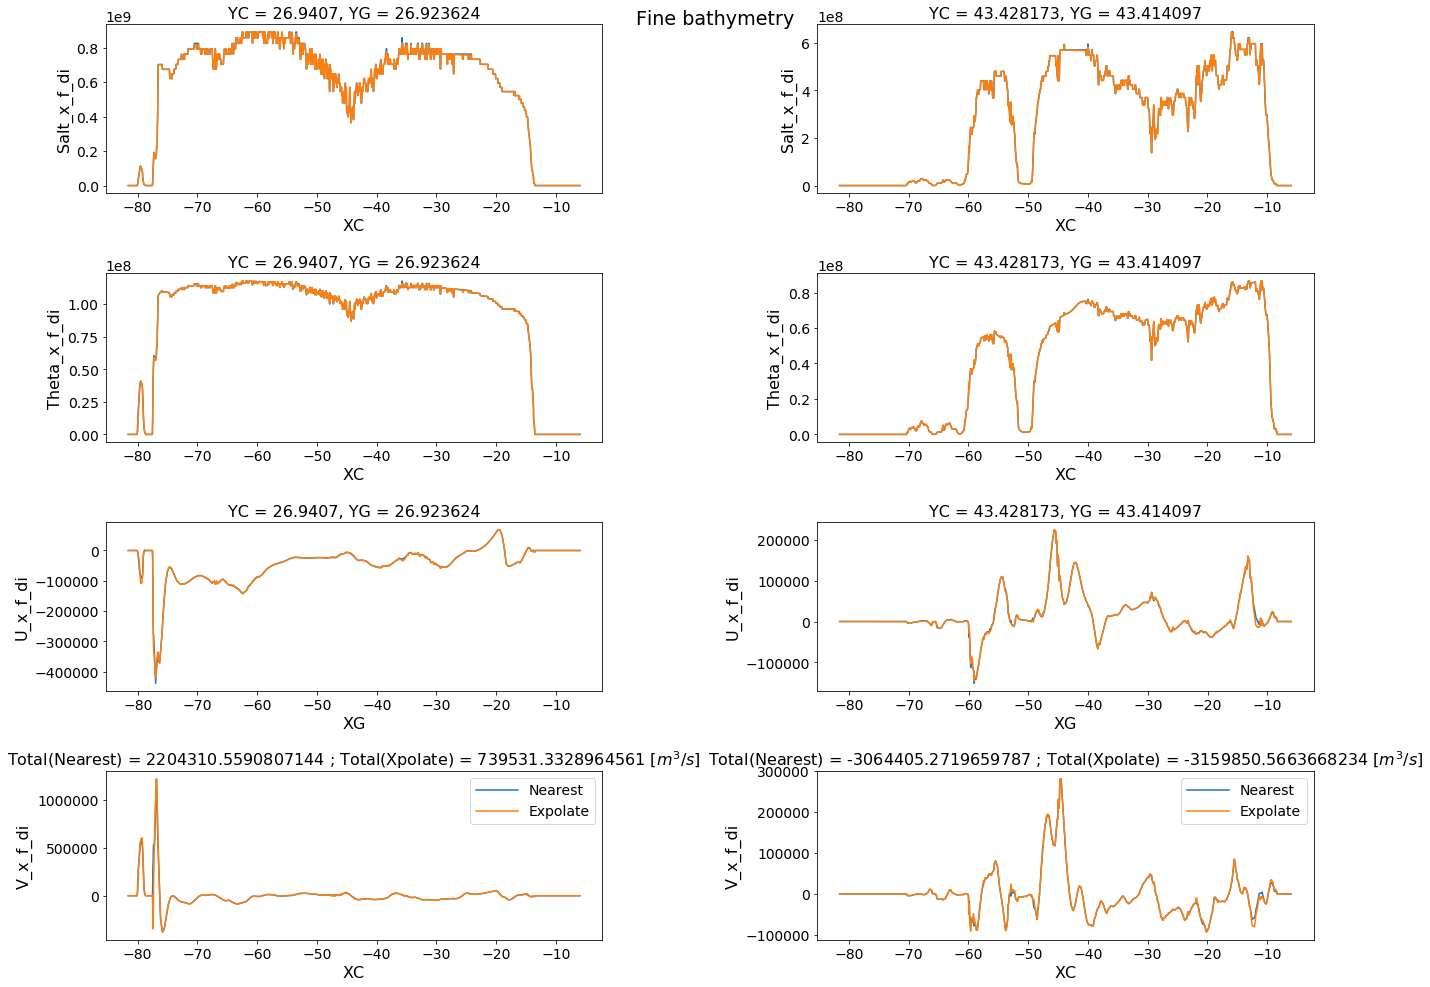

In [56]:
plt.figure(figsize=(20,14))
plt.subplot(421)
ds_f_s.Salt_l_f_di.plot(label='Nearest')
ds_f_s.Salt_x_f_di.plot(label='Expolate')

plt.subplot(423)
ds_f_s.Theta_l_f_di.plot(label='Nearest')
ds_f_s.Theta_x_f_di.plot(label='Expolate')

plt.subplot(425)
ds_f_s.U_l_f_di.plot(label='Nearest')
ds_f_s.U_x_f_di.plot(label='Expolate')

plt.subplot(427)
ds_f_s.V_l_f_di.plot(label='Nearest')
ds_f_s.V_x_f_di.plot(label='Expolate')
plt.legend()

plt.title(r'Total(Nearest) = %s ; Total(Xpolate) = %s [$m^3/s$]' %(ds_f_s.V_l_f_di.sum().values,ds_f_s.V_x_f_di.sum().values))

plt.subplot(422)
ds_f_n.Salt_l_f_di.plot(label='Nearest')
ds_f_n.Salt_x_f_di.plot(label='Expolate')

plt.subplot(424)
ds_f_n.Theta_l_f_di.plot(label='Nearest')
ds_f_n.Theta_x_f_di.plot(label='Expolate')

plt.subplot(426)
ds_f_n.U_l_f_di.plot(label='Nearest')
ds_f_n.U_x_f_di.plot(label='Expolate')

plt.subplot(428)
ds_f_n.V_l_f_di.plot(label='Nearest')
ds_f_n.V_x_f_di.plot(label='Expolate')
plt.legend()

plt.title(r'Total(Nearest) = %s ; Total(Xpolate) = %s [$m^3/s$]' %(ds_f_n.V_l_f_di.sum().values,ds_f_n.V_x_f_di.sum().values))

plt.suptitle('Fine bathymetry')
plt.tight_layout()


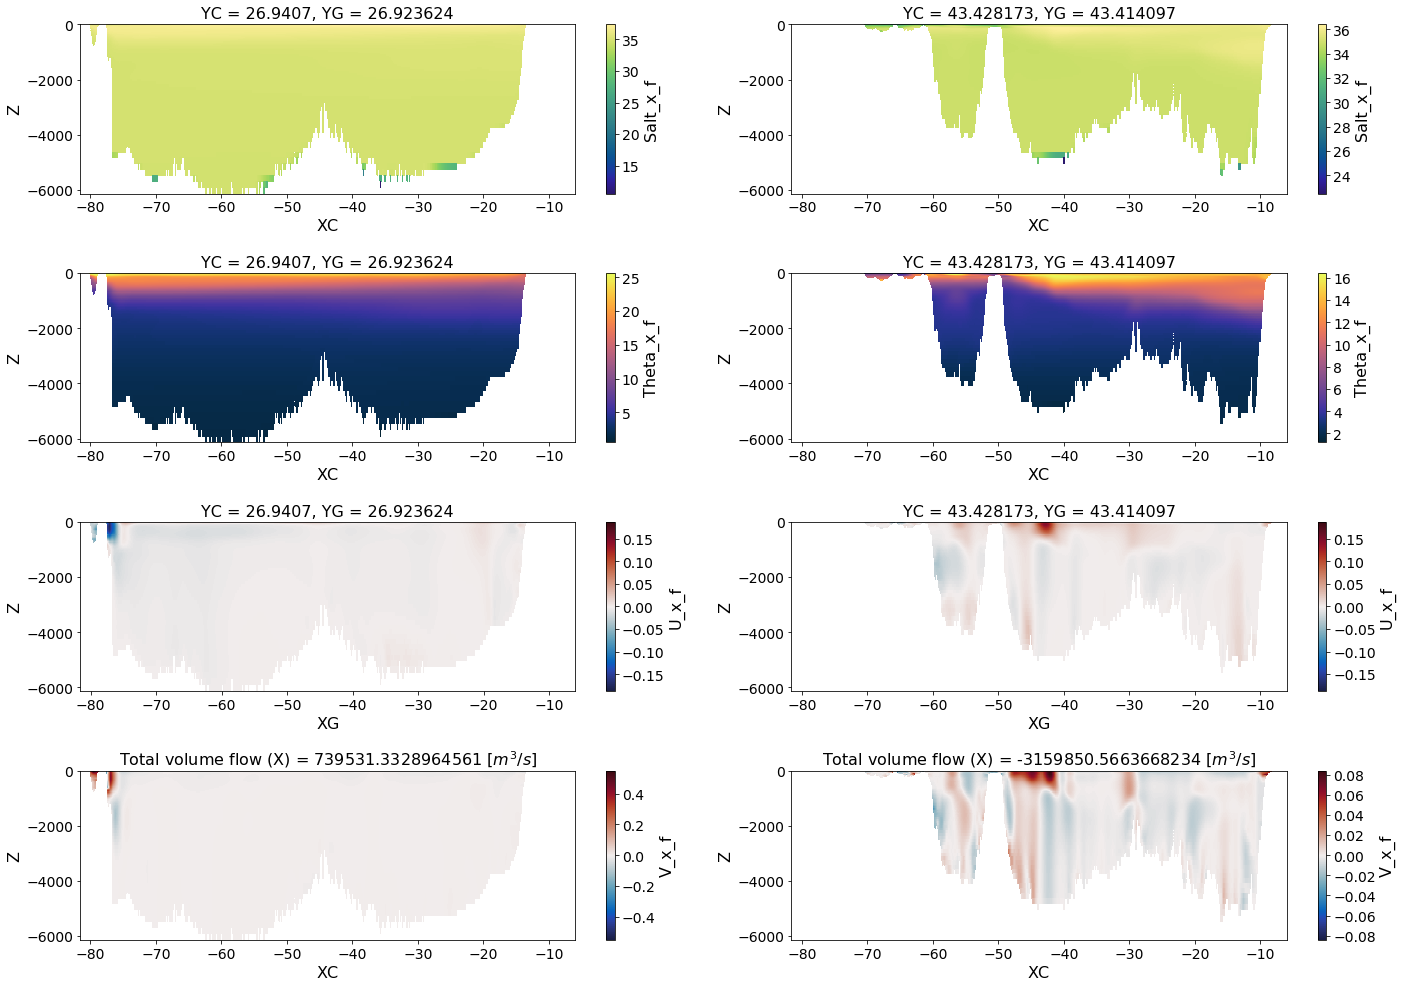

In [57]:
plt.figure(figsize=(20,14))
plt.subplot(421)
ds_f_s.Salt_x_f.plot(cmap=cmocean.cm.haline)

plt.subplot(423)
ds_f_s.Theta_x_f.plot(cmap=cmocean.cm.thermal)

plt.subplot(425)
ds_f_s.U_x_f.plot(cmap=cmocean.cm.balance)

plt.subplot(427)
ds_f_s.V_x_f.plot(cmap=cmocean.cm.balance)
plt.title(r'Total volume flow (X) = %s [$m^3/s$]' %(ds_f_s.V_x_f_di.sum().values))

plt.subplot(422)
ds_f_n.Salt_x_f.plot(cmap=cmocean.cm.haline)

plt.subplot(424)
ds_f_n.Theta_x_f.plot(cmap=cmocean.cm.thermal)

plt.subplot(426)
ds_f_n.U_x_f.plot(cmap=cmocean.cm.balance)

plt.subplot(428)
ds_f_n.V_x_f.plot(cmap=cmocean.cm.balance)
plt.title(r'Total volume flow (X) = %s [$m^3/s$]' %(ds_f_n.V_x_f_di.sum().values))

plt.tight_layout()

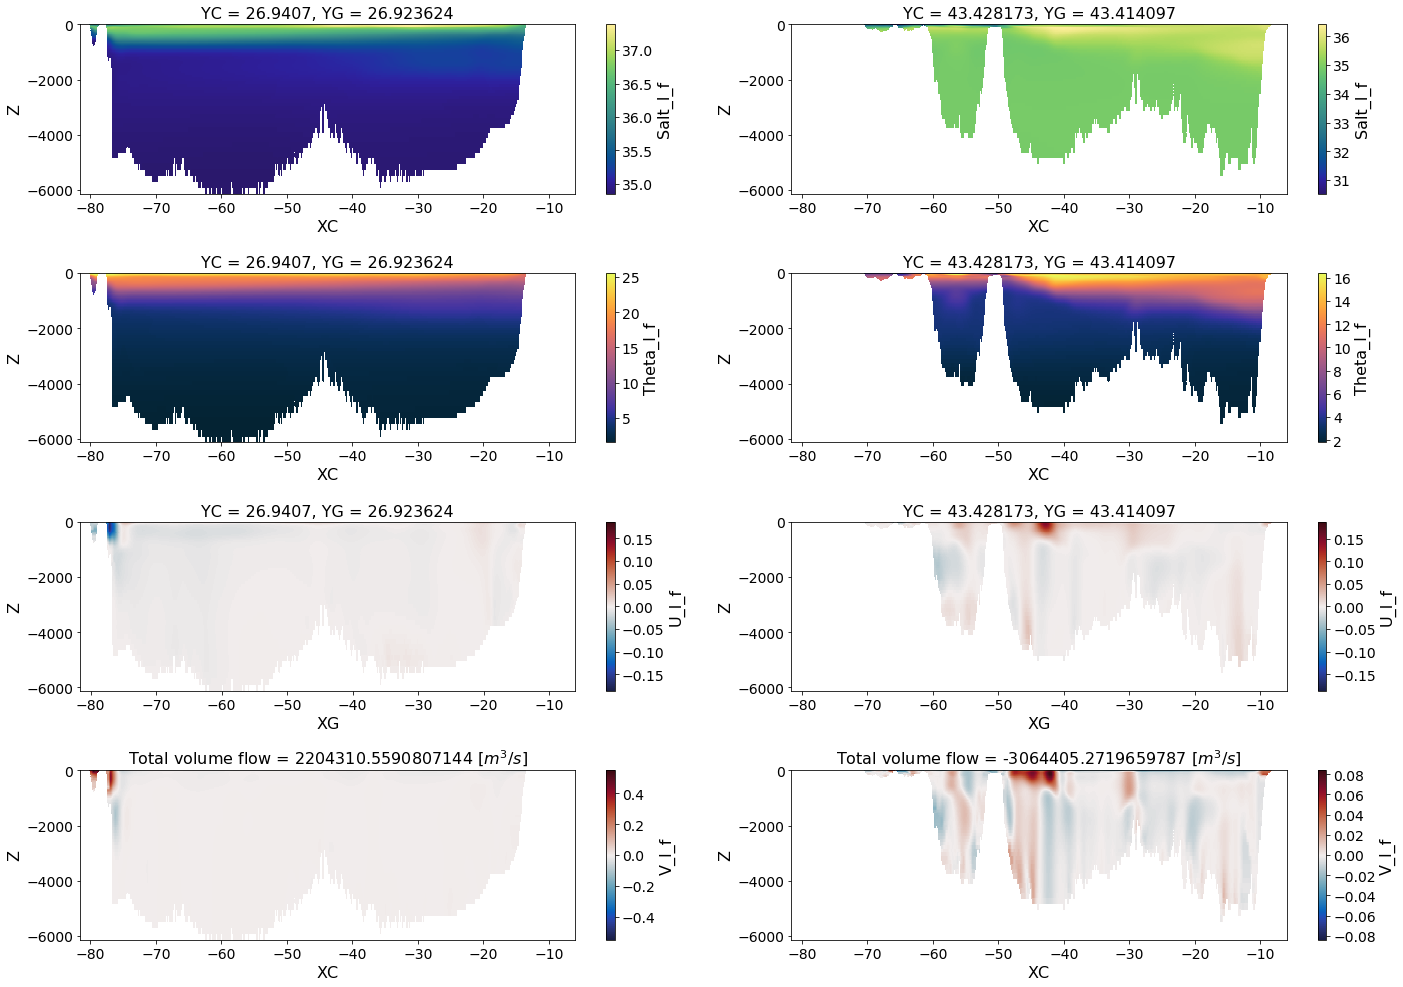

In [58]:
plt.figure(figsize=(20,14))
plt.subplot(421)
ds_f_s.Salt_l_f.plot(cmap=cmocean.cm.haline)

plt.subplot(423)
ds_f_s.Theta_l_f.plot(cmap=cmocean.cm.thermal)

plt.subplot(425)
ds_f_s.U_l_f.plot(cmap=cmocean.cm.balance)

plt.subplot(427)
ds_f_s.V_l_f.plot(cmap=cmocean.cm.balance)
plt.title(r'Total volume flow = %s [$m^3/s$]' %(ds_f_s.V_l_f_di.sum().values))

plt.subplot(422)
ds_f_n.Salt_l_f.plot(cmap=cmocean.cm.haline)

plt.subplot(424)
ds_f_n.Theta_l_f.plot(cmap=cmocean.cm.thermal)

plt.subplot(426)
ds_f_n.U_l_f.plot(cmap=cmocean.cm.balance)

plt.subplot(428)
ds_f_n.V_l_f.plot(cmap=cmocean.cm.balance)
plt.title(r'Total volume flow = %s [$m^3/s$]' %(ds_f_n.V_l_f_di.sum().values))

plt.tight_layout()

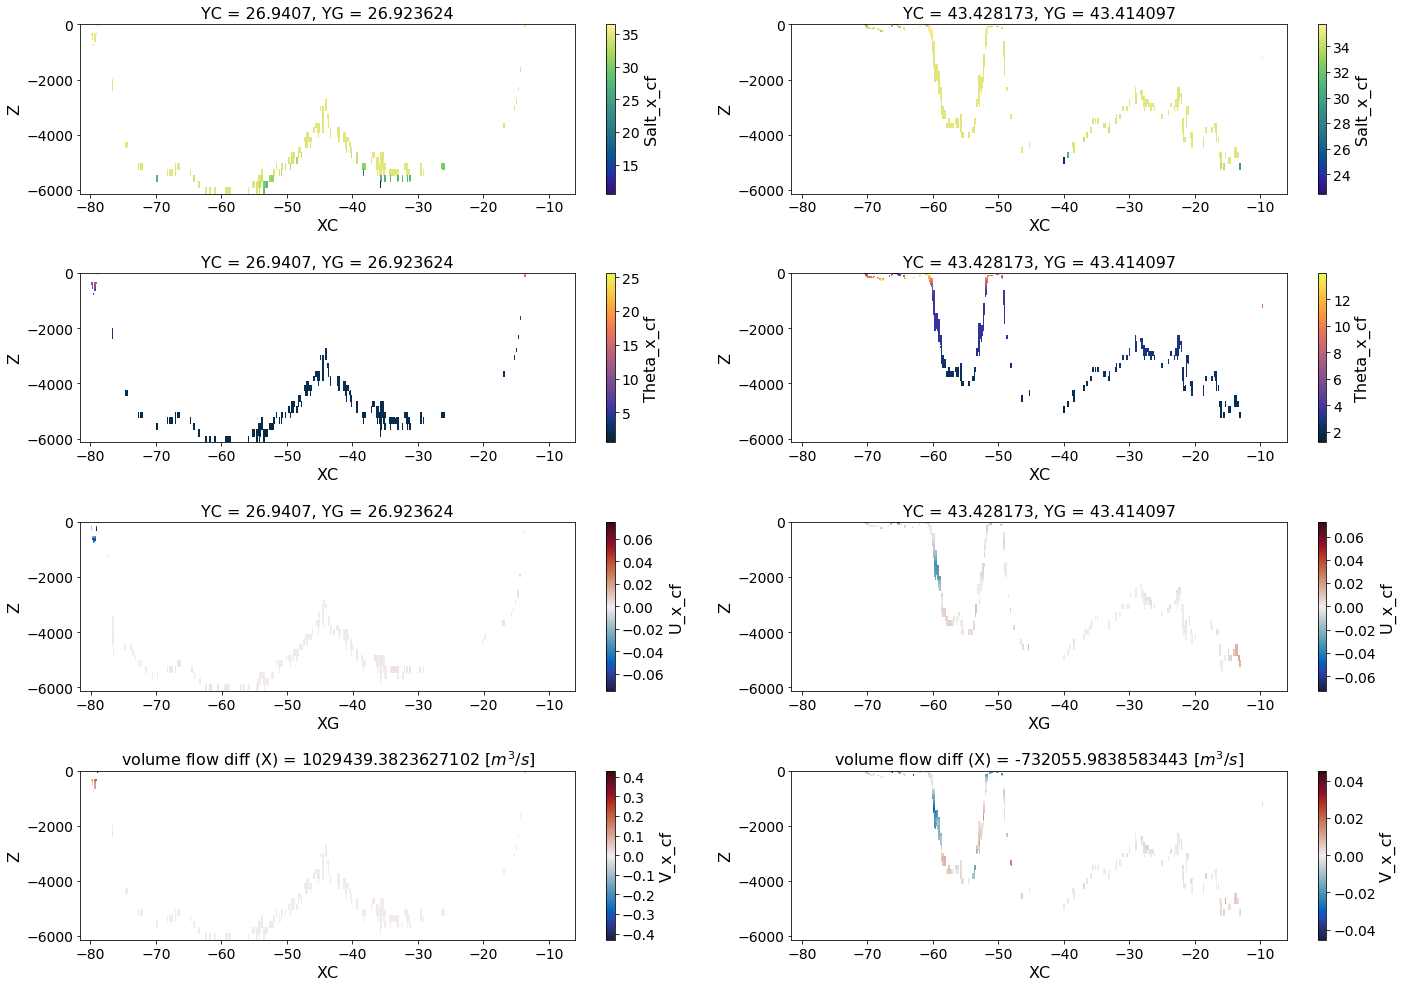

In [60]:
plt.figure(figsize=(20,14))
plt.subplot(421)
ds_f_s.Salt_x_cf.plot(cmap=cmocean.cm.haline)

plt.subplot(423)
ds_f_s.Theta_x_cf.plot(cmap=cmocean.cm.thermal)

plt.subplot(425)
ds_f_s.U_x_cf.plot(cmap=cmocean.cm.balance)

plt.subplot(427)
ds_f_s.V_x_cf.plot(cmap=cmocean.cm.balance)
plt.title(r'volume flow diff (X) = %s [$m^3/s$]' %(ds_f_s.V_x_di.sum().values))

plt.subplot(422)
ds_f_n.Salt_x_cf.plot(cmap=cmocean.cm.haline)

plt.subplot(424)
ds_f_n.Theta_x_cf.plot(cmap=cmocean.cm.thermal)

plt.subplot(426)
ds_f_n.U_x_cf.plot(cmap=cmocean.cm.balance)

plt.subplot(428)
ds_f_n.V_x_cf.plot(cmap=cmocean.cm.balance)
plt.title(r'volume flow diff (X) = %s [$m^3/s$]' %(ds_f_n.V_x_di.sum().values))

plt.tight_layout()

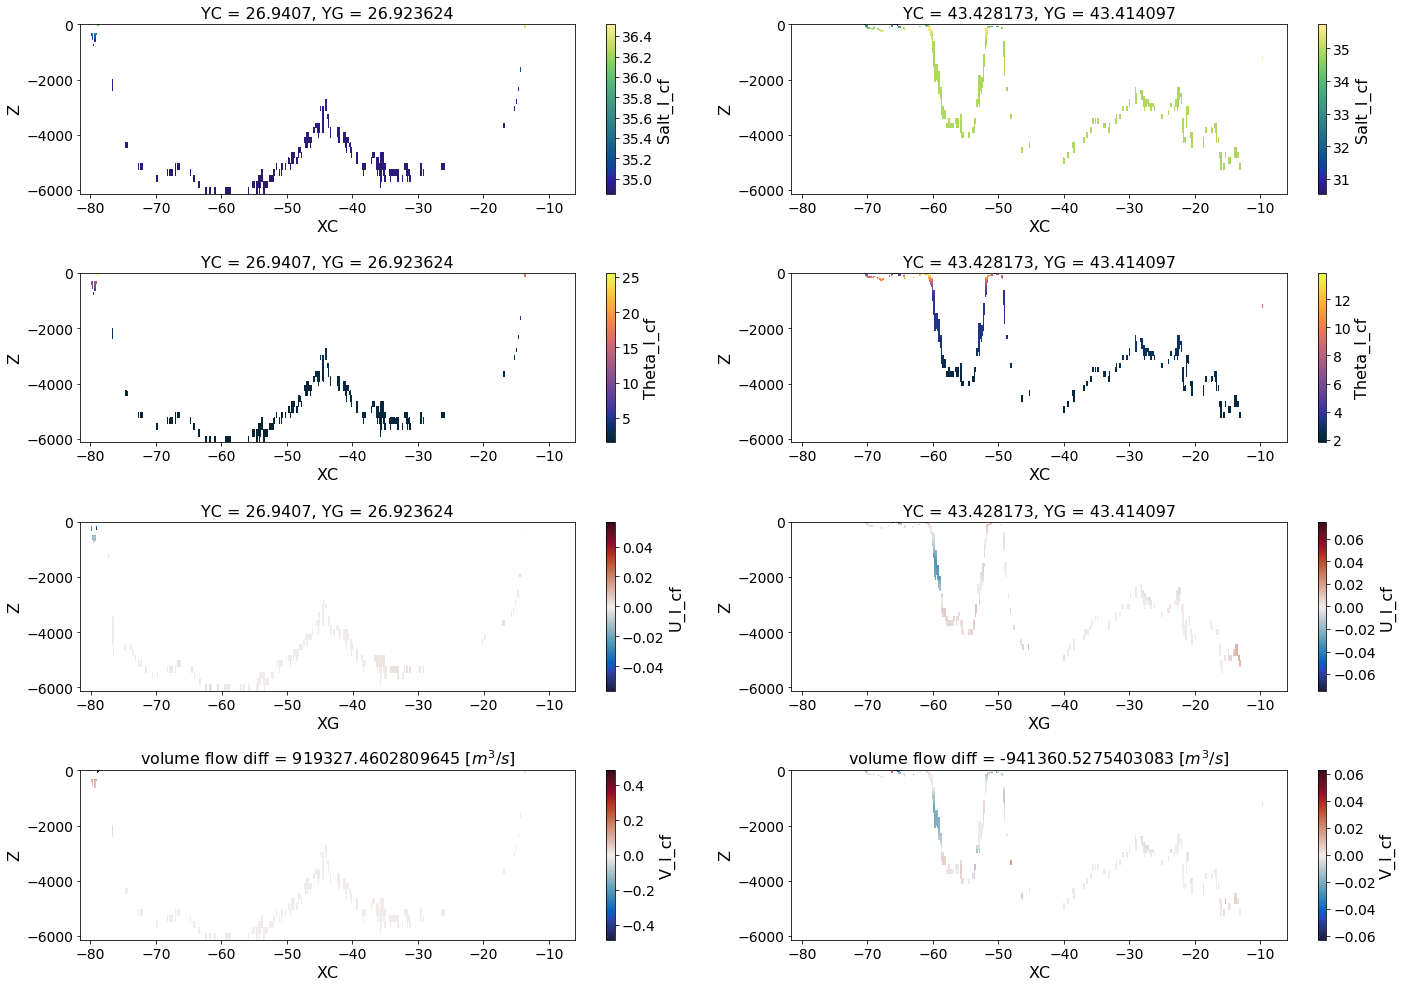

In [61]:
plt.figure(figsize=(20,14))
plt.subplot(421)
ds_f_s.Salt_l_cf.plot(cmap=cmocean.cm.haline)

plt.subplot(423)
ds_f_s.Theta_l_cf.plot(cmap=cmocean.cm.thermal)

plt.subplot(425)
ds_f_s.U_l_cf.plot(cmap=cmocean.cm.balance)

plt.subplot(427)
ds_f_s.V_l_cf.plot(cmap=cmocean.cm.balance)
plt.title(r'volume flow diff = %s [$m^3/s$]' %(ds_f_s.V_l_di.sum().values))

plt.subplot(422)
ds_f_n.Salt_l_cf.plot(cmap=cmocean.cm.haline)

plt.subplot(424)
ds_f_n.Theta_l_cf.plot(cmap=cmocean.cm.thermal)

plt.subplot(426)
ds_f_n.U_l_cf.plot(cmap=cmocean.cm.balance)

plt.subplot(428)
ds_f_n.V_l_cf.plot(cmap=cmocean.cm.balance)
plt.title(r'volume flow diff = %s [$m^3/s$]' %(ds_f_n.V_l_di.sum().values))

plt.tight_layout()

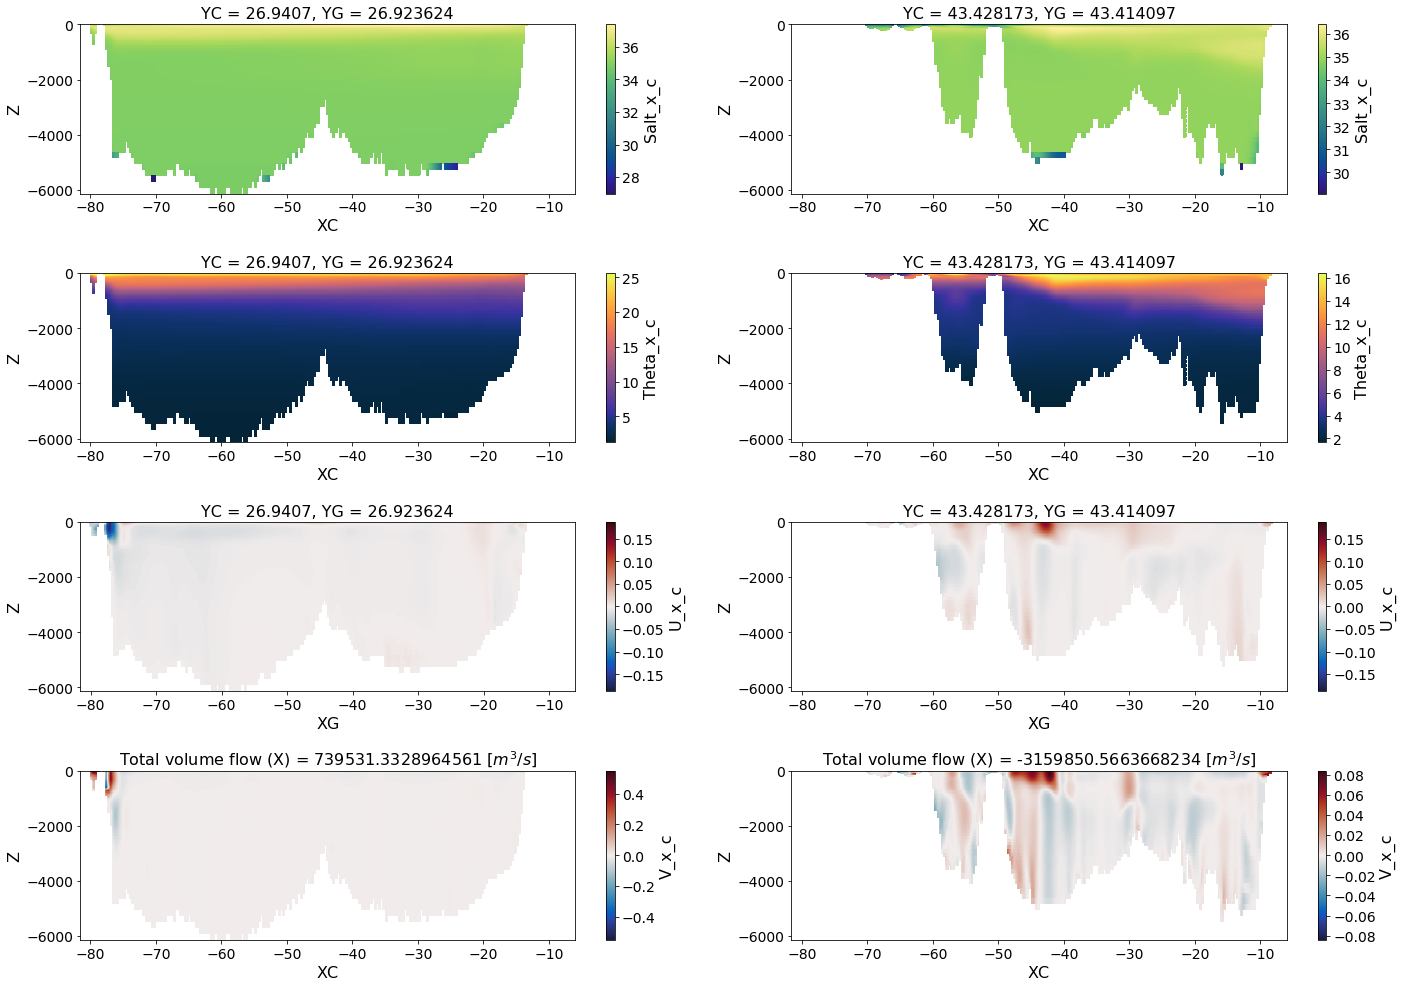

In [62]:
plt.figure(figsize=(20,14))
plt.subplot(421)
ds_f_s.Salt_x_c.plot(cmap=cmocean.cm.haline)

plt.subplot(423)
ds_f_s.Theta_x_c.plot(cmap=cmocean.cm.thermal)

plt.subplot(425)
ds_f_s.U_x_c.plot(cmap=cmocean.cm.balance)

plt.subplot(427)
ds_f_s.V_x_c.plot(cmap=cmocean.cm.balance)
plt.title(r'Total volume flow (X) = %s [$m^3/s$]' %(ds_f_s.V_x_f_di.sum().values))

plt.subplot(422)
ds_f_n.Salt_x_c.plot(cmap=cmocean.cm.haline)

plt.subplot(424)
ds_f_n.Theta_x_c.plot(cmap=cmocean.cm.thermal)

plt.subplot(426)
ds_f_n.U_x_c.plot(cmap=cmocean.cm.balance)

plt.subplot(428)
ds_f_n.V_x_c.plot(cmap=cmocean.cm.balance)
plt.title(r'Total volume flow (X) = %s [$m^3/s$]' %(ds_f_n.V_x_f_di.sum().values))

plt.tight_layout()

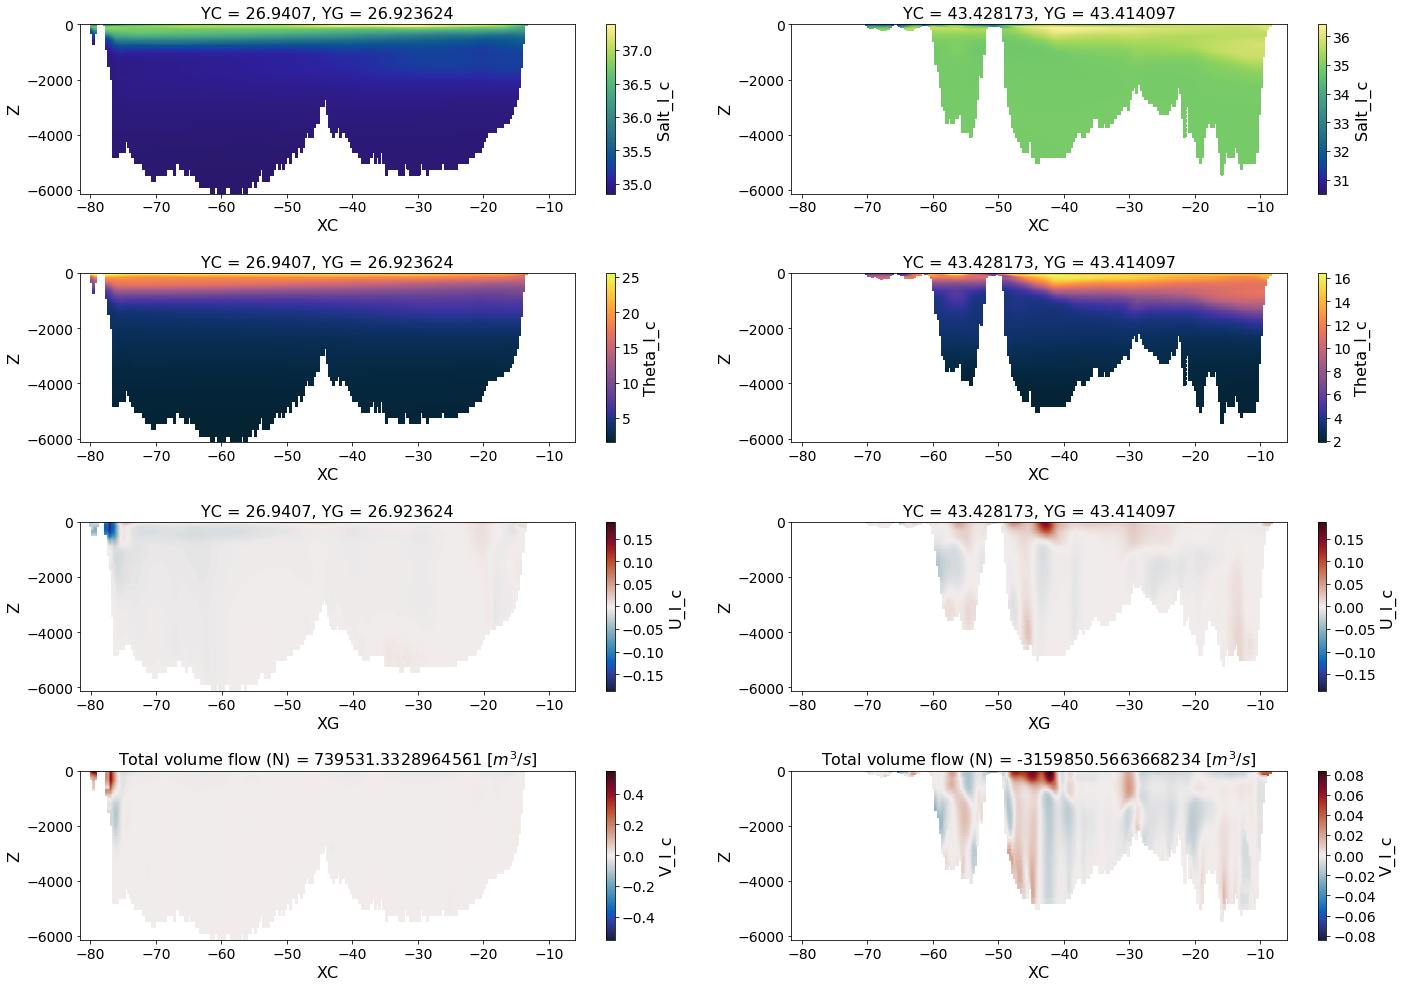

In [63]:
plt.figure(figsize=(20,14))
plt.subplot(421)
ds_f_s.Salt_l_c.plot(cmap=cmocean.cm.haline)

plt.subplot(423)
ds_f_s.Theta_l_c.plot(cmap=cmocean.cm.thermal)

plt.subplot(425)
ds_f_s.U_l_c.plot(cmap=cmocean.cm.balance)

plt.subplot(427)
ds_f_s.V_l_c.plot(cmap=cmocean.cm.balance)
plt.title(r'Total volume flow (N) = %s [$m^3/s$]' %(ds_f_s.V_x_f_di.sum().values))

plt.subplot(422)
ds_f_n.Salt_l_c.plot(cmap=cmocean.cm.haline)

plt.subplot(424)
ds_f_n.Theta_l_c.plot(cmap=cmocean.cm.thermal)

plt.subplot(426)
ds_f_n.U_l_c.plot(cmap=cmocean.cm.balance)

plt.subplot(428)
ds_f_n.V_l_c.plot(cmap=cmocean.cm.balance)
plt.title(r'Total volume flow (N) = %s [$m^3/s$]' %(ds_f_n.V_x_f_di.sum().values))

plt.tight_layout()

In [64]:
print(ds_f_s.V_x_di.sum().values/ds_f_s.V_x_f_di.sum().values,ds_f_n.V_x_di.sum().values/ds_f_n.V_x_f_di.sum().values )

1.3920159113891728 0.23167424170316311


In [65]:
print(ds_f_s.V_l_di.sum().values/ds_f_s.V_l_f_di.sum().values,ds_f_n.V_l_di.sum().values/ds_f_n.V_l_f_di.sum().values )

0.4170589559142523 0.30719191621034364


In [66]:
ds_c['dZ'] = xr.DataArray(ds_llc270.drF.values, coords={'Z':z}, dims = ['Z'])

In [67]:
ds_c_n = ds_c.sel(YC = ds_f_n.YC.values,YG = ds_f_n.YG.values, method='nearest')
ds_c_s = ds_c.sel(YC = ds_f_s.YC.values,YG = ds_f_s.YG.values, method='nearest')

In [68]:
varsc = ['salt','theta','U','V']
dxco = ['dxG','dxG','dxC','dxG']
for it,v in enumerate(varsc):
    ds_c_s[v+'_di'] = (ds_c_s[v]* ds_c_s[dx[it]] * ds_c_s.dZ).sum(dim='Z')
    ds_c_n[v+'_di'] = (ds_c_n[v]* ds_c_n[dx[it]] * ds_c_n.dZ).sum(dim='Z')

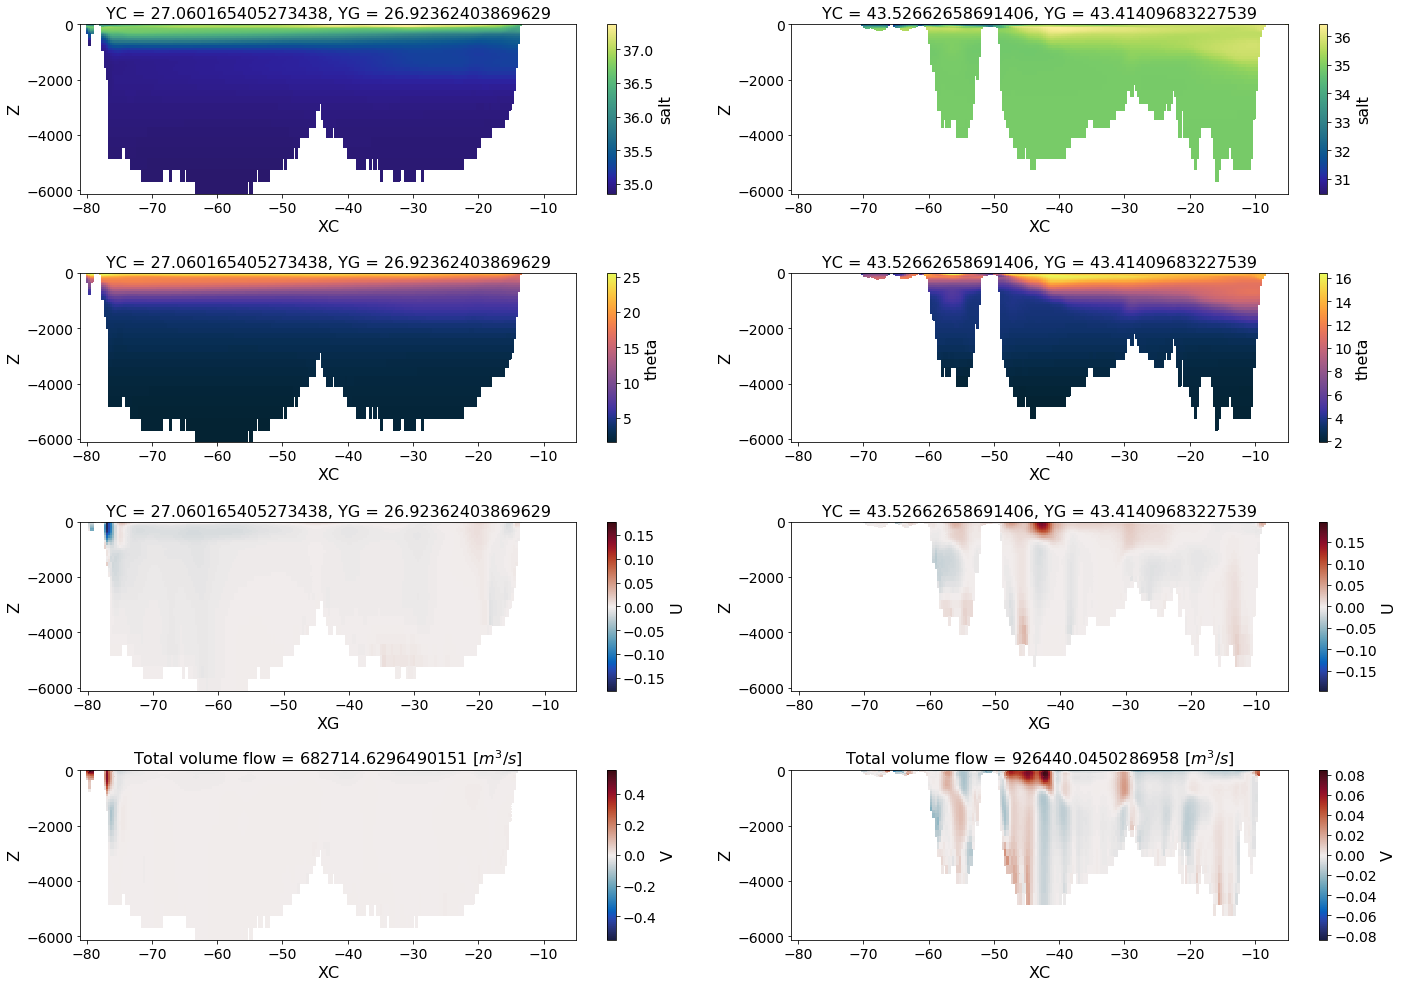

In [69]:
plt.figure(figsize=(20,14))
plt.subplot(421)
ds_c_s.salt.plot(cmap=cmocean.cm.haline)

plt.subplot(423)
ds_c_s.theta.plot(cmap=cmocean.cm.thermal)

plt.subplot(425)
ds_c_s.U.plot(cmap=cmocean.cm.balance)

plt.subplot(427)
ds_c_s.V.plot(cmap=cmocean.cm.balance)
plt.title(r'Total volume flow = %s [$m^3/s$]' %(ds_c_s.V_di.sum().values))

plt.subplot(422)
ds_c_n.salt.plot(cmap=cmocean.cm.haline)

plt.subplot(424)
ds_c_n.theta.plot(cmap=cmocean.cm.thermal)

plt.subplot(426)
ds_c_n.U.plot(cmap=cmocean.cm.balance)

plt.subplot(428)
ds_c_n.V.plot(cmap=cmocean.cm.balance)
plt.title(r'Total volume flow = %s [$m^3/s$]' %(ds_c_n.V_di.sum().values))

plt.tight_layout()

In [72]:
ds_f.to_netcdf('STUV_fine_1815x532x100.nc')

In [76]:
ds_f_n.to_netcdf('STUV_N_1815x100.nc')
ds_f_s.to_netcdf('STUV_S_1815x100.nc')

In [75]:
ds_c.to_netcdf('STUV_coarsellc270_228x72x50.nc')
ds_c_n.to_netcdf('STUV_coarse_N_228x50.nc')
ds_c_s.to_netcdf('STUV_coarse_S_228x50.nc')

<xarray.Dataset>
Dimensions:  (XC: 228, XG: 228, YC: 72, YG: 72, Z: 50)
Coordinates:
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -35.0 ... -5039.25 -5461.25 -5906.25
  * YC       (YC) float64 26.24 26.51 26.79 27.06 ... 43.3 43.53 43.75 43.97
  * XC       (XC) float64 -80.83 -80.5 -80.17 -79.83 ... -5.833 -5.5 -5.167
  * XG       (XG) float64 -81.0 -80.67 -80.33 -80.0 ... -6.0 -5.667 -5.333
  * YG       (YG) float64 26.38 26.65 26.92 27.2 ... 43.41 43.64 43.86 44.09
Data variables:
    salt     (Z, YC, XC) float64 nan nan nan 36.04 36.06 ... nan nan nan nan nan
    theta    (Z, YC, XC) float64 nan nan nan 25.34 25.53 ... nan nan nan nan nan
    U        (Z, YC, XG) float64 nan nan nan nan 0.3321 ... nan nan nan nan nan
    V        (Z, YG, XC) float64 nan nan nan 0.3942 0.5406 ... nan nan nan nan
    salt_l   (Z, YC, XC) float64 36.04 36.04 36.04 36.04 ... 34.87 34.87 34.87
    theta_l  (Z, YC, XC) float64 25.34 25.34 25.34 25.34 ... 1.622 1.622 1.622
    U_l      (Z, YC, XG) float64 0.3321 

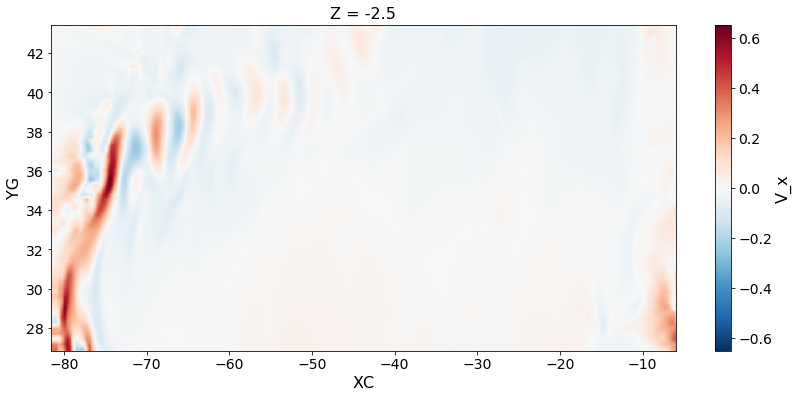

In [85]:
ds_f.V_x.isel(Z=0).plot()

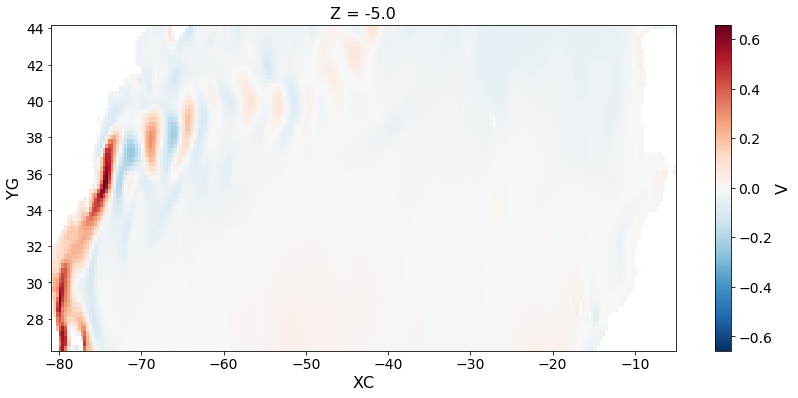

In [226]:
ds_c.V.isel(Z=0).plot()